<a href="https://colab.research.google.com/github/nv-hiep/customer_clustering/blob/main/Customer_Segmentation_with_Kmeans_and_Hierarchical_clustering_using_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer Segmentation with Kmeans and Hierarchical clustering using R

Here I use Customers.csv data

Refer to "Customer_Segmentation_DataAnalysis_R.ipnb" for the details of data analysis.

https://colab.research.google.com/notebook#create=true&language=r

# 1. Packages

In [1]:
install.packages("factoextra")
install.packages("ggpubr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("NbClust")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
install.packages("plot3D")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘misc3d’




# 2. Load libraries

In [4]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [5]:
library(stringr)
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [6]:
library(factoextra)
library(NbClust)
library(cluster)    # clustering algorithms
library(ggpubr)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [7]:
library(plot3D)

Warning message:
“no DISPLAY variable so Tk is not available”


# 3. Connect to Google Drive

In [8]:
getwd()

[1] "/content"

In [9]:
system("ls", TRUE)

[1] "sample_data"

In [10]:
system("pwd", TRUE)

[1] "/content"

# 4. Data Directories

In [11]:
BASE_PATH <- '/content/'
DATA_PATH <- paste0(BASE_PATH, 'sample_data/')
DATA_PATH

[1] "/content/sample_data/"

In [12]:
list.dirs()

[1] "."                         "./.config"                
[3] "./.config/configurations"  "./.config/logs"           
[5] "./.config/logs/2021.08.25" "./sample_data"

In [13]:
setwd(DATA_PATH)
getwd()

[1] "/content/sample_data"

In [14]:
system("ls", TRUE)

[1] "anscombe.json"                "california_housing_test.csv" 
[3] "california_housing_train.csv" "Customers.csv"               
[5] "mnist_test.csv"               "mnist_train_small.csv"       
[7] "README.md"

# 5. Read data

In [15]:
# Read in the dataset as a tibble
data_file <- paste0(DATA_PATH, 'Customers.csv')
tb        <- read.csv(data_file)
glimpse(tb)

Rows: 200
Columns: 5
$ CustomerID     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, …
$ Genre          <chr> "Male", "Male", "Female", "Female", "Female", "Female",…
$ Age            <int> 19, 21, 20, 23, 31, 22, 35, 23, 64, 30, 67, 35, 58, 24,…
$ Annual.Income  <int> 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 19, 20, 20,…
$ Spending.Score <int> 39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 14, 99, 15, 77, 13…


In [16]:
tb$Genre <- as.factor(tb$Genre)

In [17]:
head(tb, 2)

,CustomerID,Genre,Age,Annual.Income,Spending.Score
,<int>,<fct>,<int>,<int>,<int>
1,1,Male,19,15,39
2,2,Male,21,15,81


In [18]:
summary(tb)

   CustomerID        Genre          Age        Annual.Income    Spending.Score 
 Min.   :  1.00   Female:112   Min.   :18.00   Min.   : 15.00   Min.   : 1.00  
 1st Qu.: 50.75   Male  : 88   1st Qu.:28.75   1st Qu.: 41.50   1st Qu.:34.75  
 Median :100.50                Median :36.00   Median : 61.50   Median :50.00  
 Mean   :100.50                Mean   :38.85   Mean   : 60.56   Mean   :50.20  
 3rd Qu.:150.25                3rd Qu.:49.00   3rd Qu.: 78.00   3rd Qu.:73.00  
 Max.   :200.00                Max.   :70.00   Max.   :137.00   Max.   :99.00  

In [19]:
cat('Number of columns:', length(colnames(tb)), '\n' )
print( paste('Number of columns:', length(colnames(tb))) )
colnames(tb)

Number of columns: 5 
[1] "Number of columns: 5"


[1] "CustomerID"     "Genre"          "Age"            "Annual.Income" 
[5] "Spending.Score"

In [20]:
cat('Number of (row and columns):', dim(tb) )

Number of (row and columns): 200 5

In [21]:
# Number of columns and rows
NROW(tb)
NCOL(tb)

[1] 200

[1] 5

In [22]:
# Check Null/NaN values
sum(is.na(tb))

[1] 0

In [23]:
# Remove any missing value that might be present in the data
tb <- na.omit(tb)

# 6. Data Wrangling

In [24]:
# The k-Means algorithm is not applicable to categorical data,
# as categorical variables are discrete and do not have any natural origin.
# So computing euclidean distance for such as space is not meaningful.

tb_scaled <- tb %>%
         select(Age, Annual.Income, Spending.Score) %>% as_tibble()
head(tb_scaled,4)

Age,Annual.Income,Spending.Score
<int>,<int>,<int>
19,15,39
21,15,81
20,16,6
23,16,77


In [25]:
# As we don’t want the clustering algorithm to depend to an arbitrary variable unit,
# we start by scaling/standardizing the data using the R function scale.

# Standardize the data
tb_scaled <- scale(tb_scaled) %>% as_tibble()
head(tb_scaled,4)

Age,Annual.Income,Spending.Score
<dbl>,<dbl>,<dbl>
-1.421003,-1.734646,-0.4337131
-1.277829,-1.734646,1.1927111
-1.349416,-1.696572,-1.7116178
-1.134655,-1.696572,1.0378135


In [26]:
# Add scaled values to tb
tb$Annual.Income.Scaled = tb_scaled$Annual.Income
tb$Spending.Score.Scaled = tb_scaled$Spending.Score
tb$Age.Scaled = tb_scaled$Age

In [27]:
glimpse(tb)

Rows: 200
Columns: 8
$ CustomerID            <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…
$ Genre                 <fct> Male, Male, Female, Female, Female, Female, Fema…
$ Age                   <int> 19, 21, 20, 23, 31, 22, 35, 23, 64, 30, 67, 35, …
$ Annual.Income         <int> 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 19, …
$ Spending.Score        <int> 39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 14, 99, 15,…
$ Annual.Income.Scaled  <dbl> -1.734646, -1.734646, -1.696572, -1.696572, -1.6…
$ Spending.Score.Scaled <dbl> -0.4337131, 1.1927111, -1.7116178, 1.0378135, -0…
$ Age.Scaled            <dbl> -1.4210029, -1.2778288, -1.3494159, -1.1346547, …


In [28]:
glimpse(tb_scaled)

Rows: 200
Columns: 3
$ Age            <dbl> -1.4210029, -1.2778288, -1.3494159, -1.1346547, -0.5619…
$ Annual.Income  <dbl> -1.734646, -1.734646, -1.696572, -1.696572, -1.658498, …
$ Spending.Score <dbl> -0.4337131, 1.1927111, -1.7116178, 1.0378135, -0.394988…


In [29]:
glimpse(df)

Rows: 200
Columns: 3
$ Age            <int> 19, 21, 20, 23, 31, 22, 35, 23, 64, 30, 67, 35, 58, 24,…
$ Annual.Income  <int> 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 19, 20, 20,…
$ Spending.Score <int> 39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 14, 99, 15, 77, 13…


# 8. Distance Measures

The classification of observations into groups requires some methods for computing the distance or the (dis)similarity between each pair of observations. The result of this computation is known as a dissimilarity or distance matrix. There are many methods to calculate this distance information; the choice of distance measures is a critical step in clustering. It defines how the similarity of two elements (x, y) is calculated and it will influence the shape of the clusters.

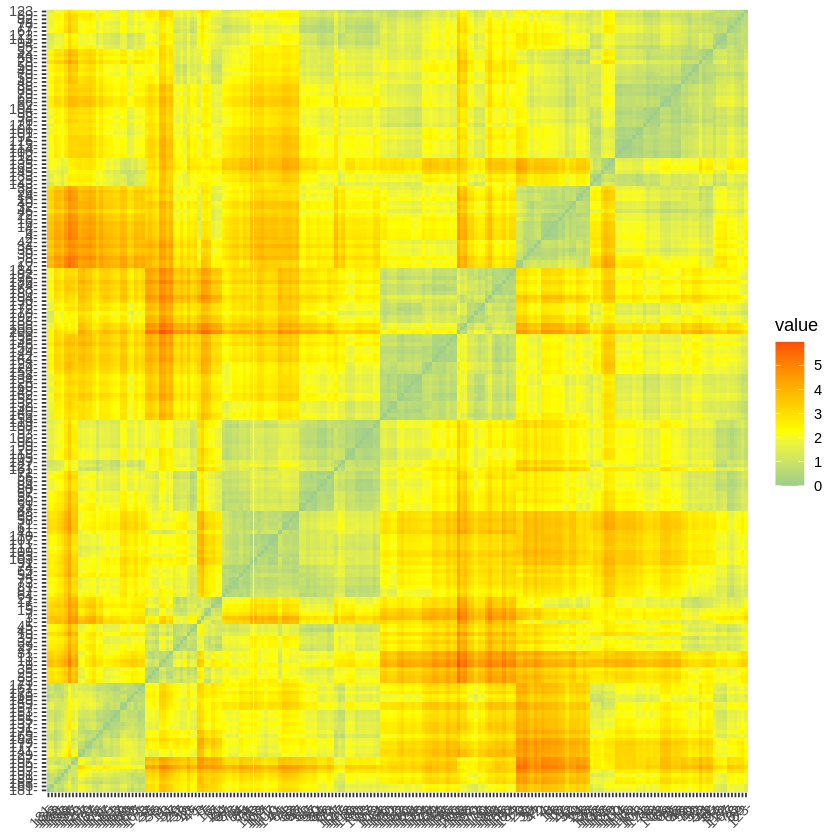

In [30]:
# Euclidean distance
d <- get_dist(tb_scaled, method = "euclidean")
# fviz_dist(d, gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))
fviz_dist(d, gradient = list(low = "#00AFBB", mid = "yellow", high = "#FC4E07"))

Observations have large dissimilarities (red) and those appear to be fairly similar (light blue).

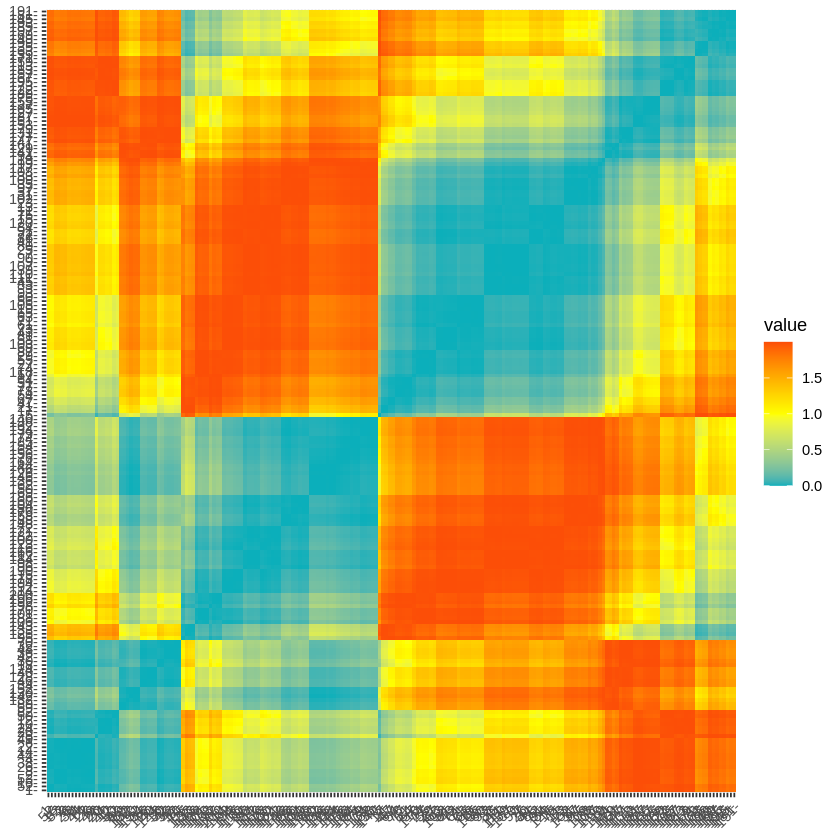

In [31]:
# Pearson
d <- get_dist(tb_scaled, method = "pearson")
# fviz_dist(d, gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))
fviz_dist(d, gradient = list(low = "#00AFBB", mid = "yellow", high = "#FC4E07"))

# 9. K-means clustering in R

K-means clustering is the most commonly used unsupervised machine learning algorithm for partitioning a given data set into a set of k groups (i.e. k clusters), where k represents the number of groups pre-specified by the analyst.


The basic idea behind k-means clustering consists of defining clusters so that the total intra-cluster variation (known as total within-cluster variation) is minimized. There are several k-means algorithms available. 

Use the "kmeans" function to compute k-means in R. Set the number of groups/clusters with (centers = 2). "nstart" option attempts multiple initial configurations and reports on the best one. For example, nstart = 25 will generate 25 initial configurations (often a recommended value).

## Spending Score vs Annual Income

### With 2 clusters

In [32]:
k2_model <- kmeans(tb_scaled, centers = 2, nstart = 25)

# Show the clusters from the model
print(k2_model$cluster)
print(k2_model)

  [1] 1 1 2 1 1 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 [38] 1 2 1 2 1 2 1 2 1 2 1 1 1 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2
 [75] 2 1 2 2 1 2 2 1 2 2 1 2 2 1 1 2 2 1 2 2 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 2 2
[112] 1 2 1 1 1 2 2 2 2 1 2 1 1 1 1 2 1 2 1 2 1 1 1 2 1 2 1 2 1 2 1 1 1 2 1 2 1
[149] 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
[186] 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
K-means clustering with 2 clusters of sizes 97, 103

Cluster means:
         Age Annual.Income Spending.Score
1 -0.7508891   0.002621995      0.7407935
2  0.7071480  -0.002469258     -0.6976405

Clustering vector:
  [1] 1 1 2 1 1 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 [38] 1 2 1 2 1 2 1 2 1 2 1 1 1 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2
 [75] 2 1 2 2 1 2 2 1 2 2 1 2 2 1 1 2 2 1 2 2 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 2 2
[112] 1 2 1 1 1 2 2 2 2 1 2 1 1 1 1 2 1 2 1 2 1 1 1 2 1 2 1 2 1 2 1 1 1 2 1 2 1
[149] 2 1 2 1 2 1 2 1 2 1 2 1 

In [33]:
str(k2_model)

List of 9
 $ cluster     : int [1:200] 1 1 2 1 1 1 2 1 2 1 ...
 $ centers     : num [1:2, 1:3] -0.75089 0.70715 0.00262 -0.00247 0.74079 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:3] "Age" "Annual.Income" "Spending.Score"
 $ totss       : num 597
 $ withinss    : num [1:2] 170 218
 $ tot.withinss: num 387
 $ betweenss   : num 210
 $ size        : int [1:2] 97 103
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


The output of kmeans is a list with several bits of information. The most important are:

cluster: A vector of integers (from 1:k) indicating the cluster to which each point is allocated.

centers: A matrix of cluster centers.

totss: The total sum of squares.

withinss: Vector of within-cluster sum of squares, one component per cluster.

tot.withinss: Total within-cluster sum of squares, i.e. sum(withinss).

betweenss: The between-cluster sum of squares, i.e. $totss-tot.withinss$.

size: The number of points in each cluster.

Plot the clusters

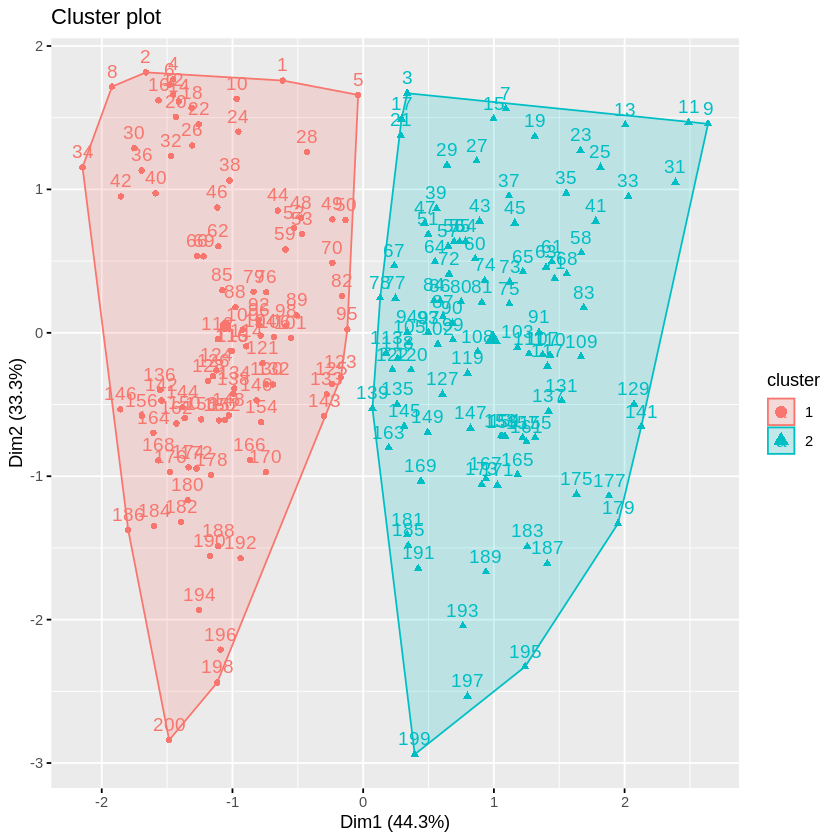

In [34]:
fviz_cluster(k2_model, data = tb_scaled)

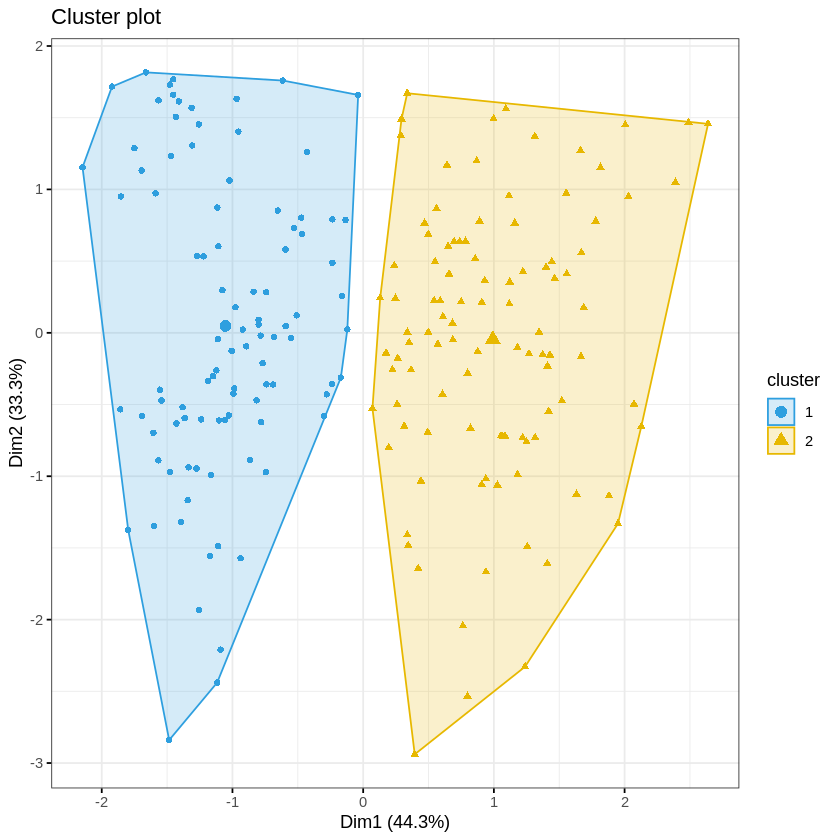

In [41]:
fviz_cluster(k2_model, data = tb_scaled,
             palette = c("#2E9FDF", "#E7B800"), 
             geom = "point",
             ellipse.type = "convex", 
             ggtheme = theme_bw()
             )

In [36]:
ss_center <- k2_model$centers[,"Spending.Score"]
ai_center <- k2_model$centers[,"Annual.Income"]
centers <- tibble(ss_center = ss_center, ai_center = ai_center)

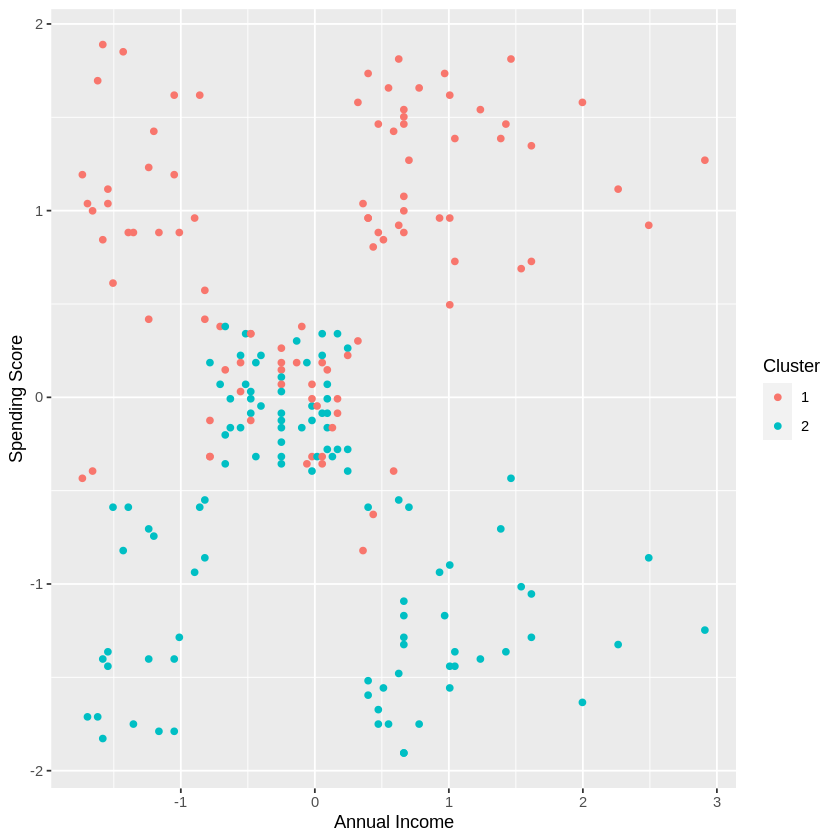

In [40]:
# Or use scatter plot
tb_scaled %>%
  mutate(cluster = k2_model$cluster) %>%
  ggplot(aes(Annual.Income, Spending.Score, color = factor(cluster), label = tb$CustomerID)) +
  guides(color = guide_legend(title = "Cluster")) +
  # geom_text() +
  geom_point() +
  # ggtitle("Annual Income vs Age")+
  ylab("Spending Score") +
  xlab("Annual Income")+
  guides(color = guide_legend(title = "Cluster"))

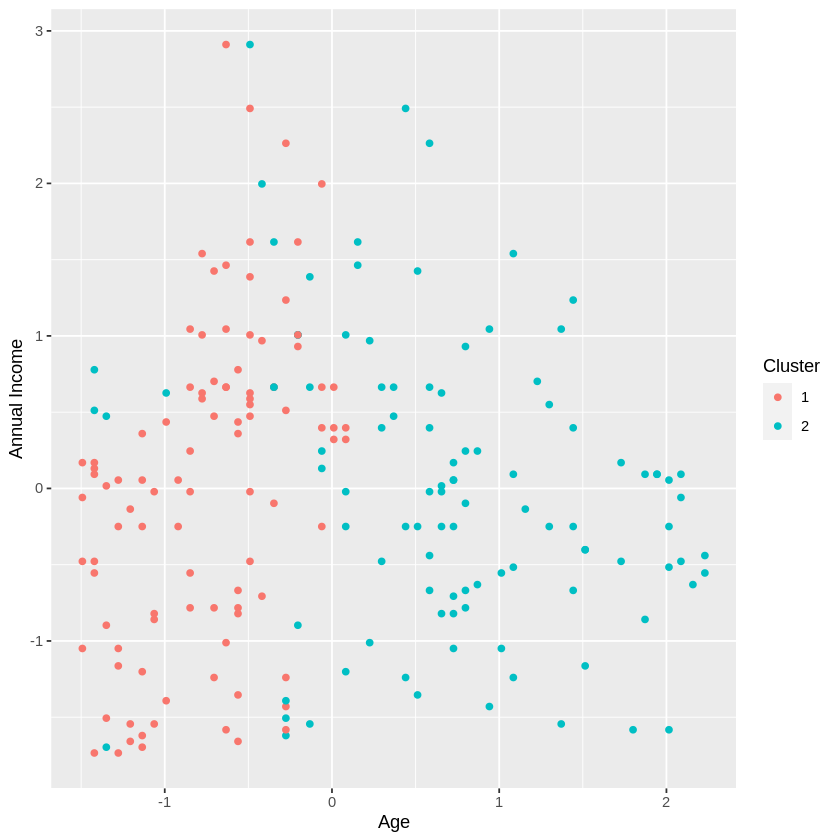

In [38]:
tb_scaled %>%
  mutate(cluster = k2_model$cluster) %>%
  ggplot(aes(Age, Annual.Income, color = factor(cluster), label = tb$CustomerID)) +
  guides(color = guide_legend(title = "Cluster")) +
  # geom_text() +
  geom_point() +
  # ggtitle("Annual Income vs Age")+
  ylab("Annual Income") +
  xlab("Age")+
  guides(color = guide_legend(title = "Cluster"))

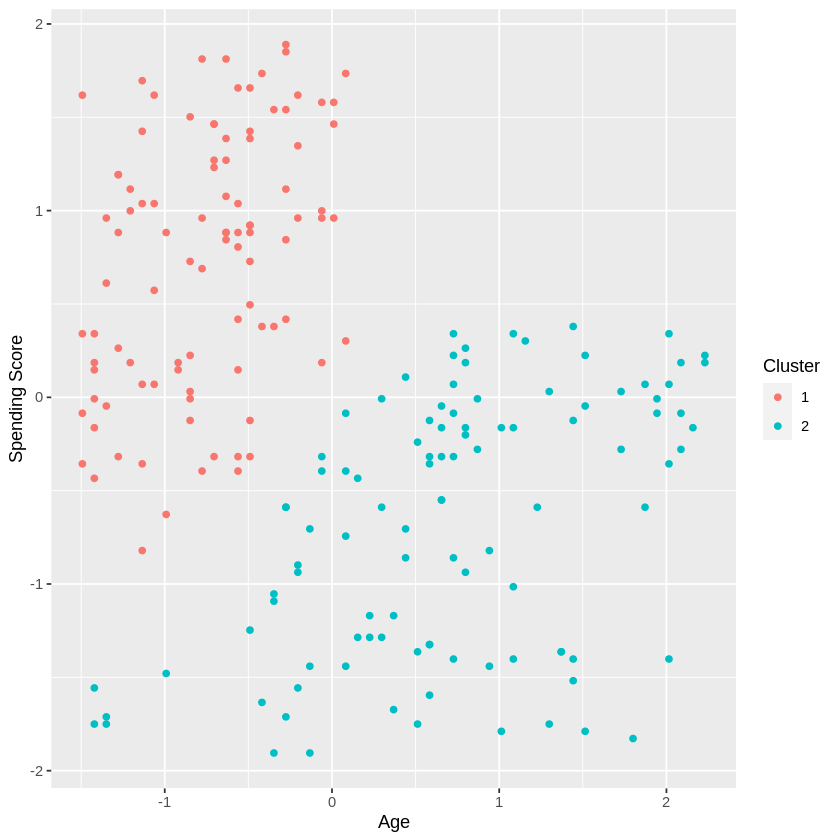

In [67]:
tb_scaled %>%
  mutate(cluster = k2_model$cluster) %>%
  ggplot(aes(Age, Spending.Score, color = factor(cluster), label = tb$CustomerID)) +
  guides(color = guide_legend(title = "Cluster")) +
  # geom_text() +
  geom_point() +
  # ggtitle("Annual Income vs Age")+
  ylab("Spending Score") +
  xlab("Age")+
  guides(color = guide_legend(title = "Cluster"))

Compute PCA and extract individual coordinates

In [50]:
# Dimension reduction using PCA
res.pca <- prcomp(tb_scaled,  scale = FALSE)

# Coordinates of individuals
ind.coord <- as.data.frame(get_pca_ind(res.pca)$coord)

# Add clusters obtained using the K-means algorithm
ind.coord$cluster <- factor(k2_model$cluster)

# Add Species groups from the original data sett
ind.coord$Genre <- tb$Genre

# Data inspection
head(ind.coord)

,Dim.1,Dim.2,Dim.3,cluster,Genre
,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,-0.61417879,1.759067,-1.32091743,1,Male
2,-1.66162301,1.816189,-0.06977714,1,Male
3,0.33701620,1.670607,-2.17357077,2,Female
4,-1.45292726,1.767993,-0.07783381,1,Female
5,-0.03836892,1.658578,-0.68562168,1,Female
6,-1.47797641,1.730659,-0.15563214,1,Female


In [51]:
s <- summary(res.pca)
attributes(s)
s

$names
[1] "sdev"       "rotation"   "center"     "scale"      "x"         
[6] "importance"

$class
[1] "summary.prcomp"

Importance of components:
                          PC1    PC2    PC3
Standard deviation     1.1524 0.9996 0.8202
Proportion of Variance 0.4427 0.3331 0.2243
Cumulative Proportion  0.4427 0.7758 1.0000

In [52]:
# Percentage of variance explained by dimensions
eigenvalue <- round(get_eigenvalue(res.pca), 1)
variance.percent <- eigenvalue$variance.percent
head(eigenvalue)

,eigenvalue,variance.percent,cumulative.variance.percent
,<dbl>,<dbl>,<dbl>
Dim.1,1.3,44.3,44.3
Dim.2,1.0,33.3,77.6
Dim.3,0.7,22.4,100.0


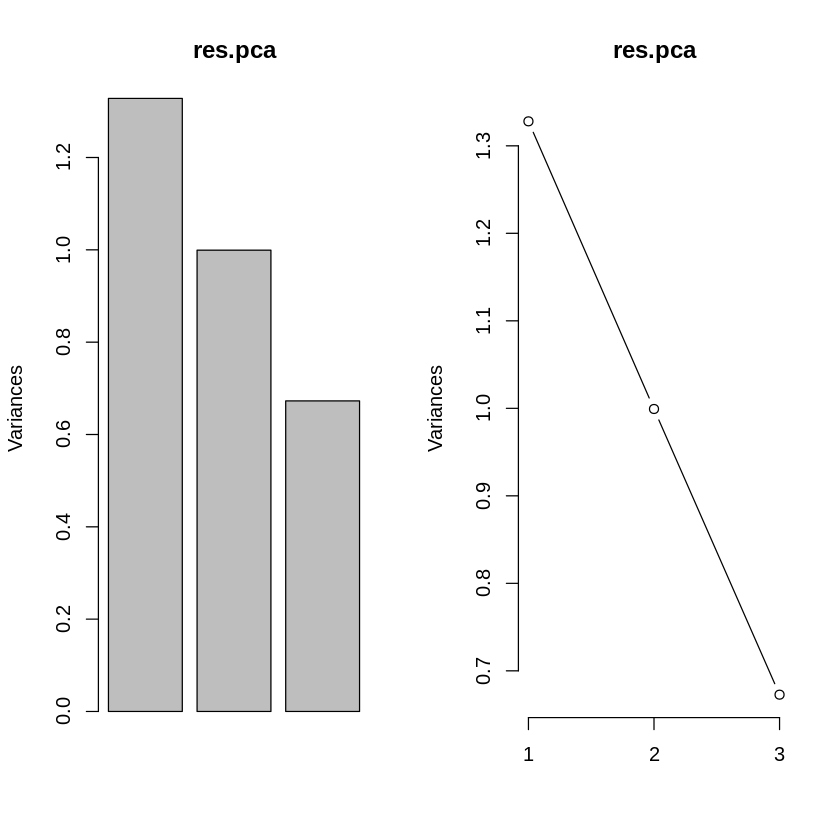

In [53]:
# A scree plot helps to assess how many principal components to keep.
layout(matrix(1:2, ncol=2)) # 2 subplots
screeplot(res.pca)
screeplot(res.pca, type="lines")

Visualize k-means clusters

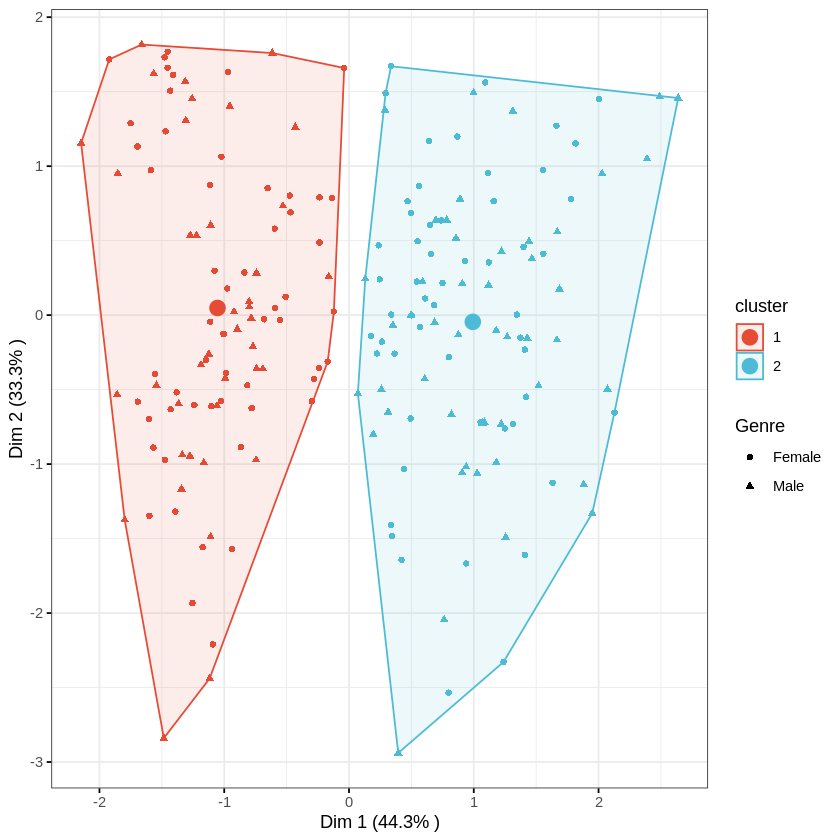

In [54]:
ggscatter(
  ind.coord, x = "Dim.1", y = "Dim.2", 
  color = "cluster", palette = "npg", ellipse = TRUE, ellipse.type = "convex",
  shape = "Genre", size = 1.5,  legend = "right", ggtheme = theme_bw(),
  xlab = paste0("Dim 1 (", variance.percent[1], "% )" ),
  ylab = paste0("Dim 2 (", variance.percent[2], "% )" )
) +
  stat_mean(aes(color = cluster), size = 4)

### Quality of a k-means partition

The quality of a k-means partition is found by calculating the percentage of the TSS “explained” by the partition using the following formula:

$\frac{BSS}{TSS} \times 100\%$

where BSS and TSS stand for "Between Sum of Squares" and "Total Sum of Squares" respectively.

The higher the percentage, the better the score (and thus the quality) because it means that BSS is large and/or WSS is small.

We can check the quality of the partition in R:

In [70]:
# BSS and TSS are extracted from the model and stored
(BSS <- k2_model$betweenss)

[1] 209.5607

In [71]:
(TSS <- k2_model$totss)

[1] 597

In [72]:
# We calculate the quality of the partition
BSS / TSS * 100

[1] 35.1023

The quality of the partition is 51.87%. This value has no real interpretation in absolute terms except that a higher quality means a higher explained percentage. However, it is more insightful when it is compared to the quality of other partitions (with the same number of clusters!) in order to determine the best partition among the ones considered.

### With more than 02 clusters

Because the number of clusters (k) must be set before we start the algorithm, it is often advantageous to use several different values of k and examine the differences in the results. We can execute the same process for 3, 4, and 5 clusters, and the results are shown in the figure:

In [73]:
k3_model <- kmeans(tb_scaled, centers = 3, nstart = 25)
k4_model <- kmeans(tb_scaled, centers = 4, nstart = 25)
k5_model <- kmeans(tb_scaled, centers = 5, nstart = 25)

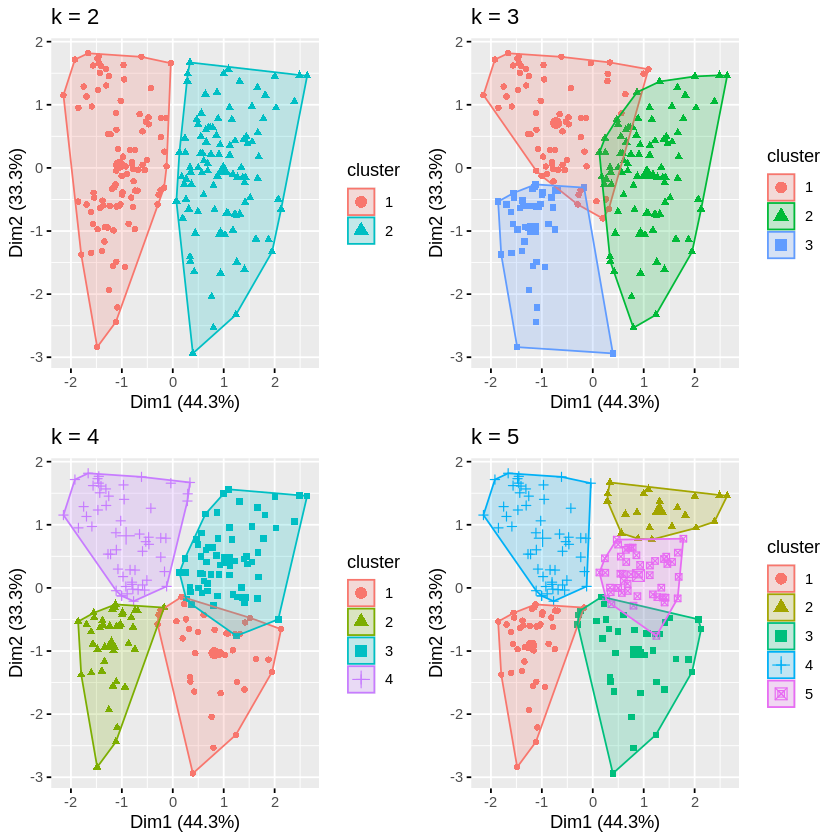

In [74]:
# plots to compare
p1 <- fviz_cluster(k2_model, geom = "point", data = tb_scaled) + ggtitle("k = 2")
p2 <- fviz_cluster(k3_model, geom = "point",  data = tb_scaled) + ggtitle("k = 3")
p3 <- fviz_cluster(k4_model, geom = "point",  data = tb_scaled) + ggtitle("k = 4")
p4 <- fviz_cluster(k5_model, geom = "point",  data = tb_scaled) + ggtitle("k = 5")

library(gridExtra)
grid.arrange(p1, p2, p3, p4, nrow = 2)


### Optimal number of clusters

In order to find the optimal number of clusters for a k-means, it is recommended to choose it based on:

- the context of the problem at hand, for instance if you know that there is a specific number of groups in your data (this is option is however subjective), 

- Or, the following four approaches:
 + Elbow method (which uses the within cluster sums of squares)
 + Average silhouette method
 + Gap statistic method
 + NbClust() function

#### Elbow Method

Recall that, the basic idea behind cluster partitioning methods, such as k-means clustering, is to define clusters such that the total intra-cluster variation (known as total within-cluster variation or total within-cluster sum of square) is minimized.

The algorithm to define the optimal clusters:

- Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 10 clusters

- For each k, calculate the total within-cluster sum of square (wss)

- Plot the curve of wss according to the number of clusters k.

- The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

In [75]:
set.seed(42)

# Calc. total within-cluster sum of square 
wss <- function(k) {
  kmeans(tb_scaled, k, nstart = 25 )$tot.withinss
}

In [76]:
# Compute and plot wss for k = 1 to k = 15
ks <- 1:15

# extract wss for 2-15 clusters
wss_values <- map_dbl(ks, wss)

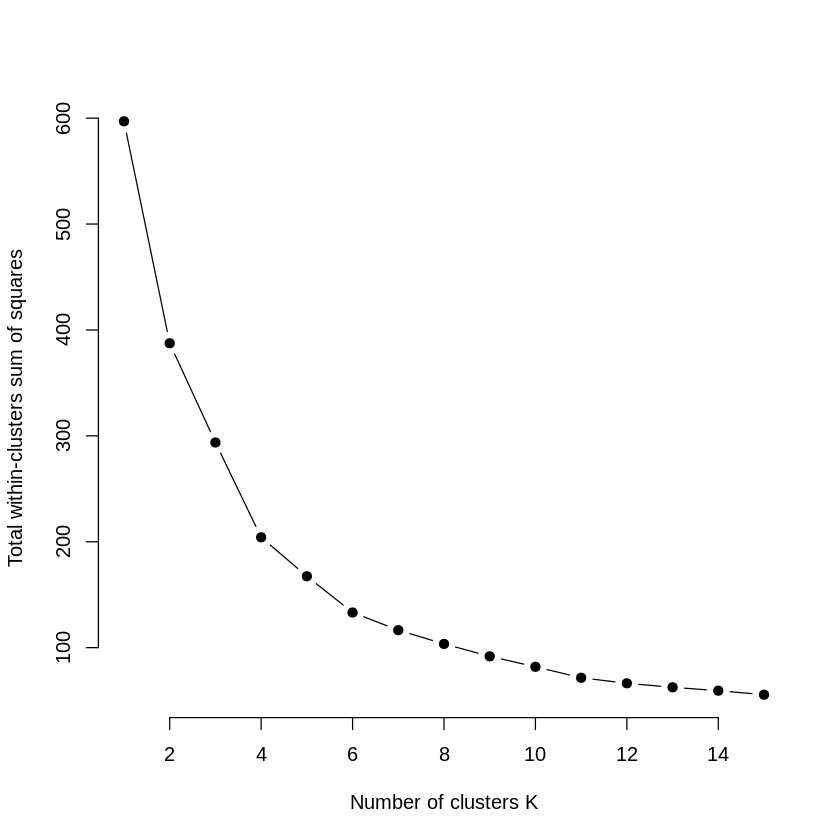

In [77]:
plot(ks, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

We can compute the “Elbow method” in a single function with (fviz_nbclust):

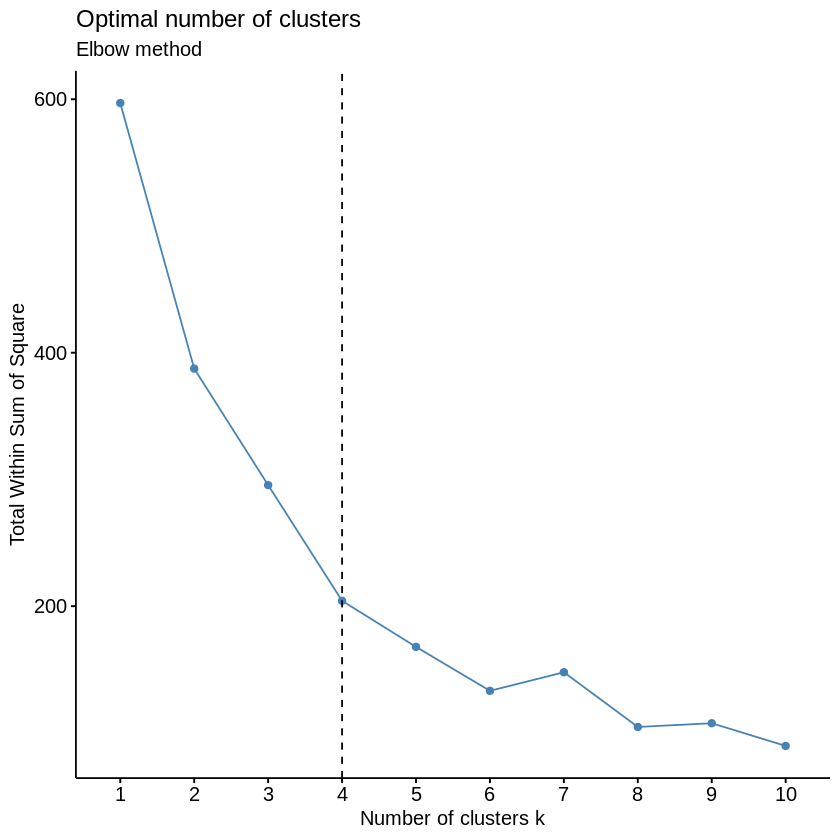

In [78]:
fviz_nbclust(tb_scaled, kmeans, method = "wss") +
  geom_vline(xintercept = 4, linetype = 2) + # add line for better visualisation
  labs(subtitle = "Elbow method") # add subtitle

#### Average Silhouette Method


In short, the average silhouette approach measures the quality of a clustering. That is, it determines how well each object lies within its cluster. A high average silhouette width indicates a good clustering. The average silhouette method computes the average silhouette of observations for different values of k. The optimal number of clusters k is the one that maximizes the average silhouette over a range of possible values for k.

In [79]:
# function to compute average silhouette for k clusters
avg_silhouette <- function(k) {
  km_res <- kmeans(tb_scaled, centers = k, nstart = 25)
  ss <- silhouette(km_res$cluster, dist(tb_scaled))
  mean(ss[, 3])
}

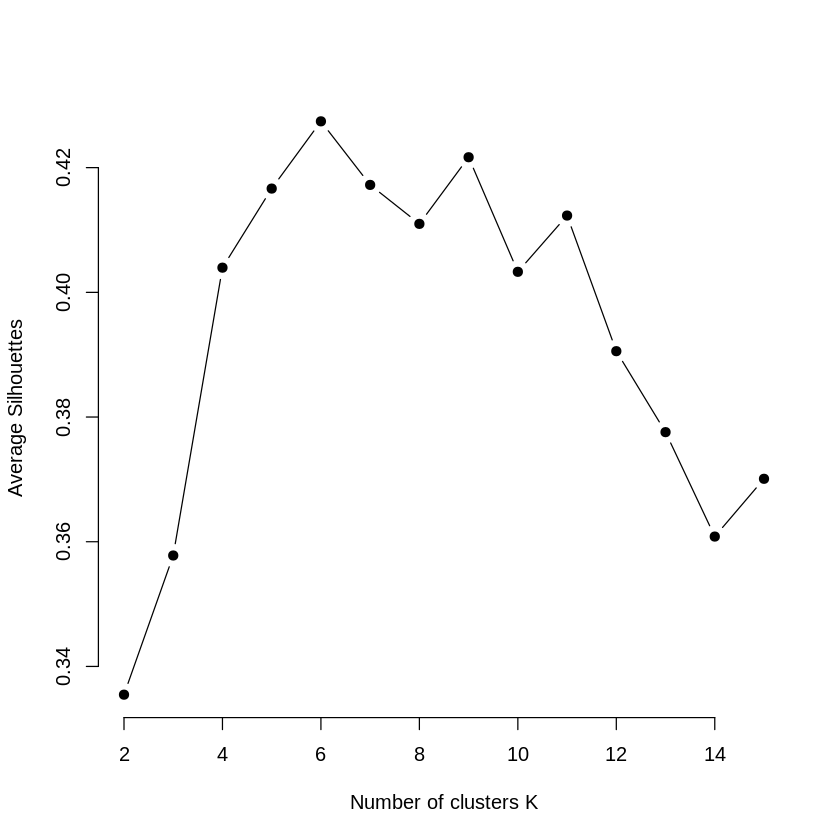

In [80]:
# Compute and plot wss for k = 2 to k = 15
ks <- 2:15

# extract avg silhouette for 2-15 clusters
avg_sil_values <- map_dbl(ks, avg_silhouette)

plot(ks, avg_sil_values,
       type = "b", pch = 19, frame = FALSE, 
       xlab = "Number of clusters K",
       ylab = "Average Silhouettes")

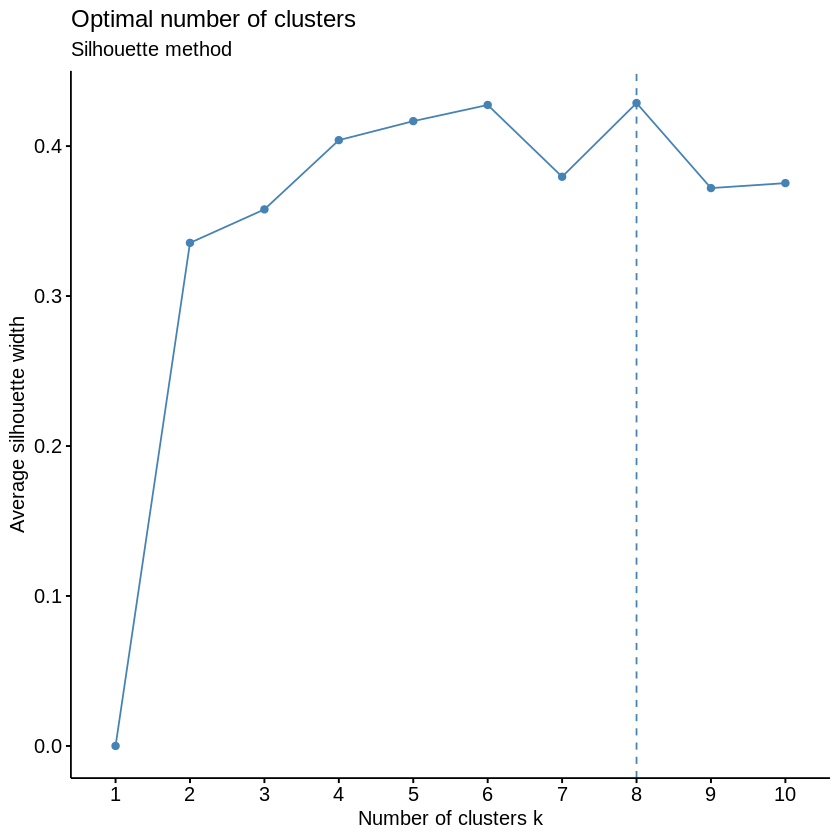

In [81]:
# Silhouette method
fviz_nbclust(tb_scaled, kmeans, method = "silhouette") +
  labs(subtitle = "Silhouette method")

#### Gap Statistic Method

The approach can be applied to any clustering method (i.e. K-means clustering, hierarchical clustering). The gap statistic compares the total intracluster variation for different values of k with their expected values under null reference distribution of the data (i.e. a distribution with no obvious clustering). The reference dataset is generated using Monte Carlo simulations of the sampling process. That is, for each variable (xi) in the data set we compute its range [min(xi),max(xj)] and generate values for the n points uniformly from the interval min to max.

In [82]:
# compute gap statistic
set.seed(42)
gap_stat <- clusGap(tb_scaled, FUN = kmeans, nstart = 25, K.max = 10, B = 50)
# Print the result
print(gap_stat, method = "firstmax")

Clustering Gap statistic ["clusGap"] from call:
clusGap(x = tb_scaled, FUNcluster = kmeans, K.max = 10, B = 50,     nstart = 25)
B=50 simulated reference sets, k = 1..10; spaceH0="scaledPCA"
 --> Number of clusters (method 'firstmax'): 7
          logW   E.logW       gap     SE.sim
 [1,] 4.721322 5.006156 0.2848334 0.01954596
 [2,] 4.482346 4.815140 0.3327946 0.01946668
 [3,] 4.322989 4.668822 0.3458330 0.02202987
 [4,] 4.150389 4.555792 0.4054030 0.01825480
 [5,] 4.046782 4.461385 0.4146037 0.01819625
 [6,] 3.928559 4.378449 0.4498908 0.01778993
 [7,] 3.842901 4.308776 0.4658750 0.01822096
 [8,] 3.788344 4.248656 0.4603119 0.01923498
 [9,] 3.735731 4.196550 0.4608192 0.01948511
[10,] 3.681420 4.149692 0.4682717 0.02029171


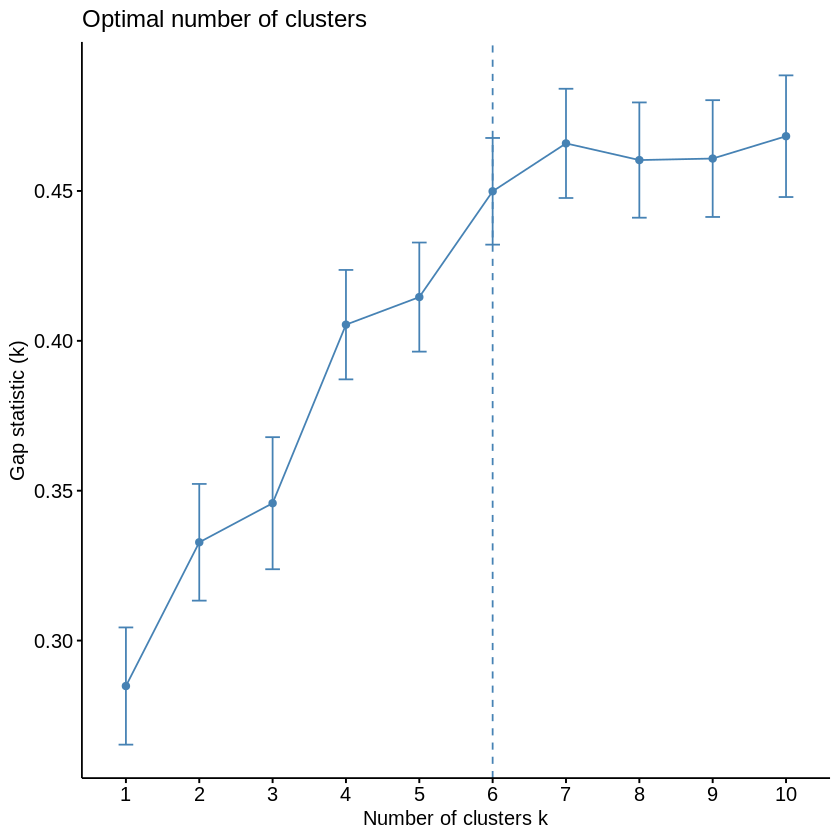

In [83]:
fviz_gap_stat(gap_stat)

Or use fviz_nbclust

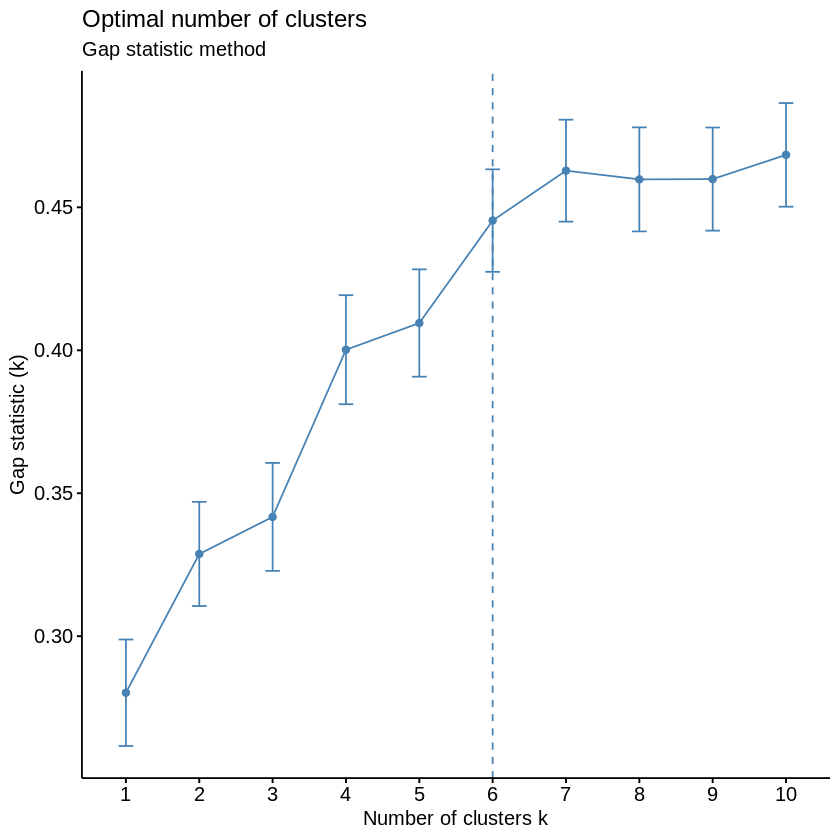

In [84]:
# Gap statistic
set.seed(42)
fviz_nbclust(tb_scaled, kmeans,
  nstart = 25,
  method = "gap_stat",
  nboot = 500 # reduce it for lower computation time (but less precise results)
) + labs(subtitle = "Gap statistic method")

#### NbClust()

A fourth alternative is to use the NbClust() function from the {NbClust} package, which provides 30 indices for choosing the best number of clusters.

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


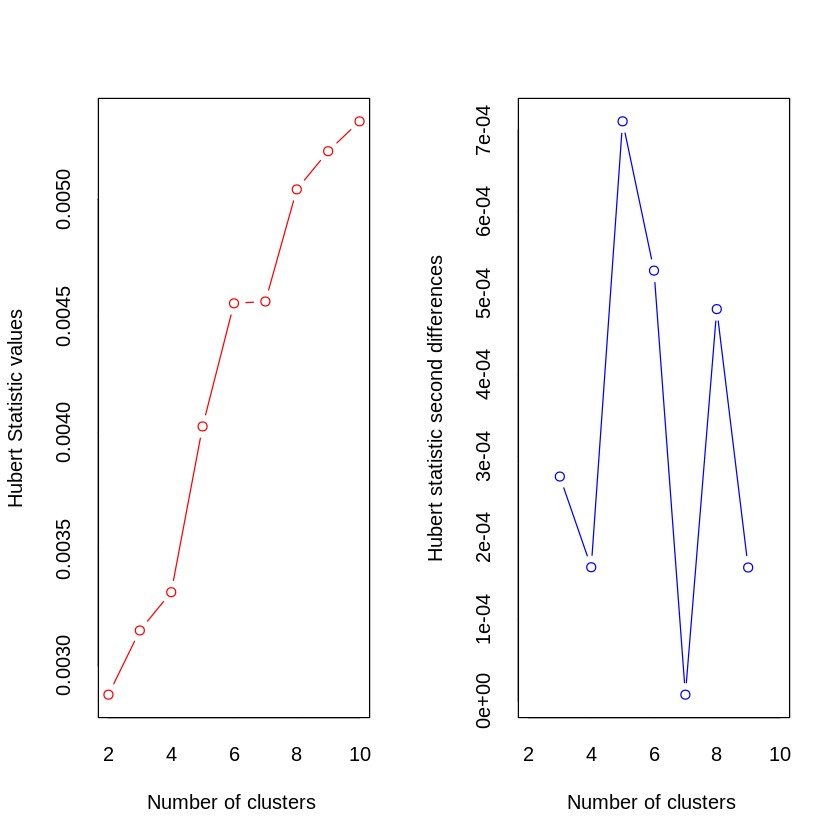

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 5 proposed 2 as the best number of clusters 
* 3 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 4 proposed 5 as the best number of clusters 
* 4 proposed 6 as the best number of clusters 
* 1 proposed 9 as the best number of clusters 
* 4 proposed 10 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


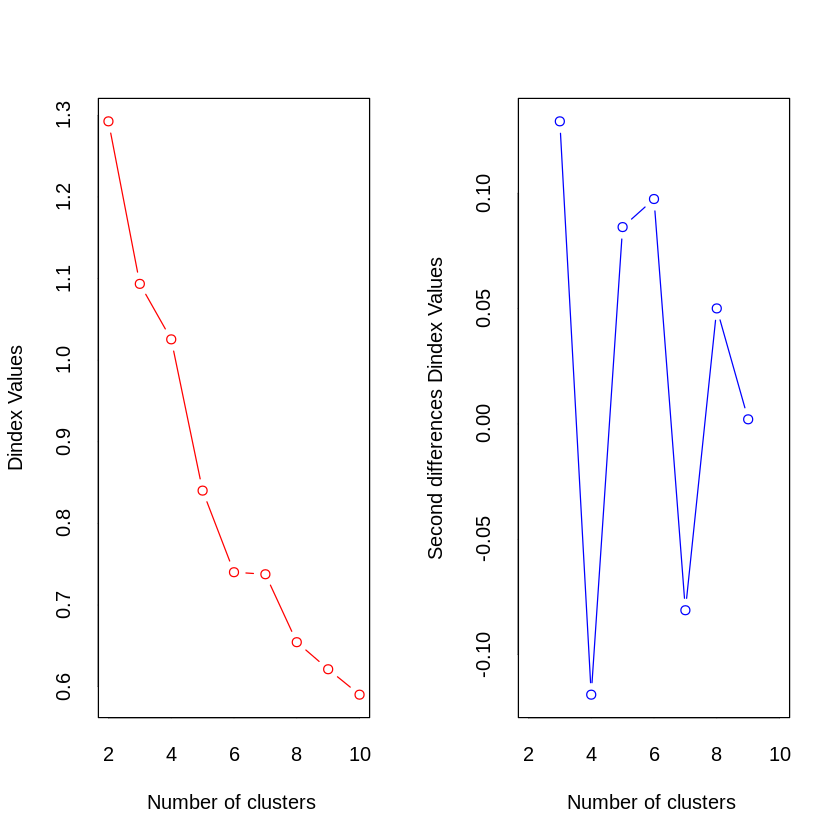

In [85]:
nbclust_out <- NbClust(
  data = tb_scaled,
  distance = "euclidean",
  min.nc = 2, # minimum number of clusters
  max.nc = 10, # maximum number of clusters
  method = "kmeans" # one of: "ward.D", "ward.D2", "single", "complete", "average", "mcquitty", "median", "centroid", "kmeans"
)

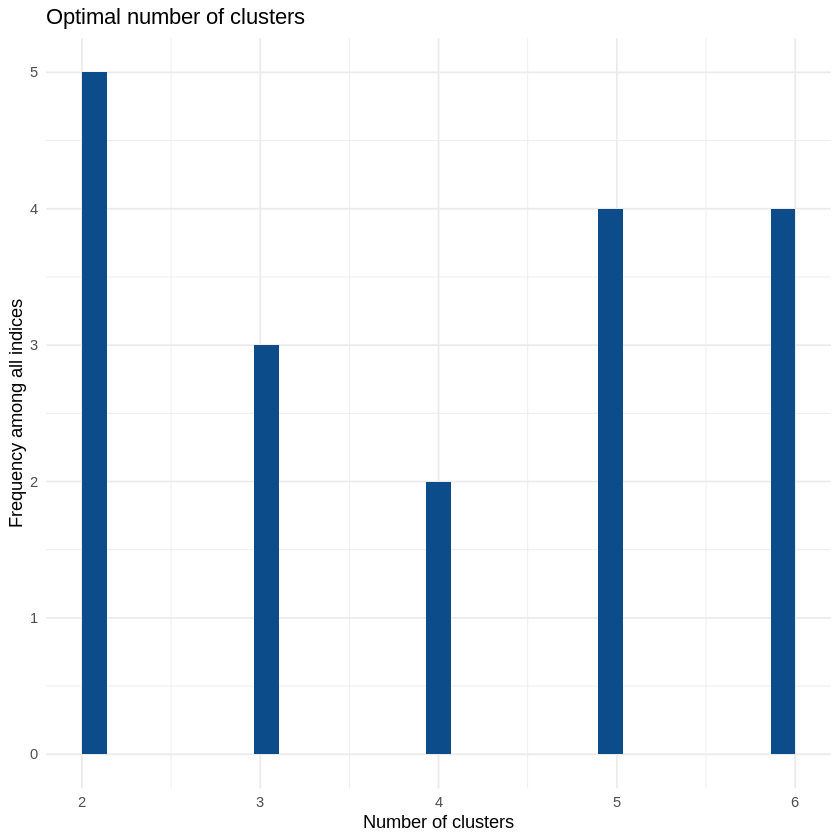

In [86]:
# create a dataframe of the optimal number of clusters
nbclust_plot <- data.frame(clusters = nbclust_out$Best.nc[1, ])
# select only indices which select between 2 and 5 clusters
nbclust_plot <- subset(nbclust_plot, clusters >= 2 & clusters <= 8)

# create plot
ggplot(nbclust_plot) +
  aes(x = clusters) +
  geom_histogram(bins = 30L, fill = "#0c4c8a") +
  labs(x = "Number of clusters", y = "Frequency among all indices", title = "Optimal number of clusters") +
  theme_minimal()

Based on all 30 indices, the best number of clusters is 6 clusters.

### Results

These approaches suggest 6 as the number of optimal clusters, we can perform the analysis and extract the results using 6 clusters.

In [87]:
kmeans_model <- kmeans(tb_scaled, centers = 6, nstart = 25)

# Show the clusters from the model
print(kmeans_model)

K-means clustering with 6 clusters of sizes 24, 38, 39, 21, 33, 45

Cluster means:
         Age Annual.Income Spending.Score
1 -0.9735839    -1.3221791     1.03458649
2 -0.8709130    -0.1135003    -0.09334615
3 -0.4408110     0.9891010     1.23640011
4  0.4777583    -1.3049552    -1.19344867
5  0.2211606     1.0805138    -1.28682305
6  1.2515802    -0.2396117    -0.04388764

Clustering vector:
  [1] 1 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 [38] 1 4 1 6 1 4 1 4 1 6 2 2 2 6 2 2 6 6 6 6 6 2 6 6 2 6 6 6 2 6 6 2 2 6 6 6 6
 [75] 6 2 6 2 2 6 6 2 6 6 2 6 6 2 2 6 6 2 6 2 2 2 6 2 6 2 2 6 6 2 6 2 6 6 6 6 6
[112] 2 2 2 2 2 6 6 6 6 2 2 2 3 2 3 5 3 5 3 5 3 2 3 5 3 5 3 2 3 5 3 2 3 5 3 5 3
[149] 5 3 5 3 5 3 5 3 5 3 5 3 6 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5
[186] 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3

Within cluster sum of squares by cluster:
[1] 11.71664 20.20990 22.36267 20.52332 34.51630 23.87015
 (between_SS / total_SS =  77.7 %)

Available components:

[1] "cl

In [88]:
str(kmeans_model)

List of 9
 $ cluster     : int [1:200] 1 1 4 1 4 1 4 1 4 1 ...
 $ centers     : num [1:6, 1:3] -0.974 -0.871 -0.441 0.478 0.221 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:6] "1" "2" "3" "4" ...
  .. ..$ : chr [1:3] "Age" "Annual.Income" "Spending.Score"
 $ totss       : num 597
 $ withinss    : num [1:6] 11.7 20.2 22.4 20.5 34.5 ...
 $ tot.withinss: num 133
 $ betweenss   : num 464
 $ size        : int [1:6] 24 38 39 21 33 45
 $ iter        : int 4
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


Visualize the results using fviz_cluster:

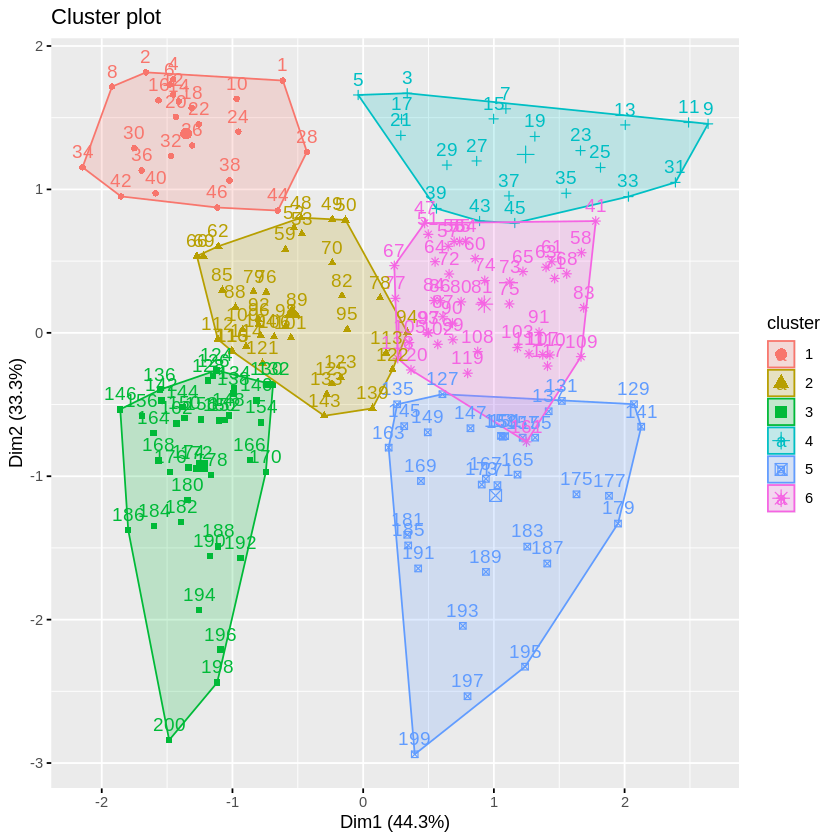

In [89]:
fviz_cluster(kmeans_model, data = tb_scaled)

## Annual Income vs Age

In [90]:
ai_age_tb <- tb %>%
         select(Age, Annual.Income.Scaled) %>% as_tibble()
head(ai_age_tb,4)

Age,Annual.Income.Scaled
<int>,<dbl>
19,-1.734646
21,-1.734646
20,-1.696572
23,-1.696572


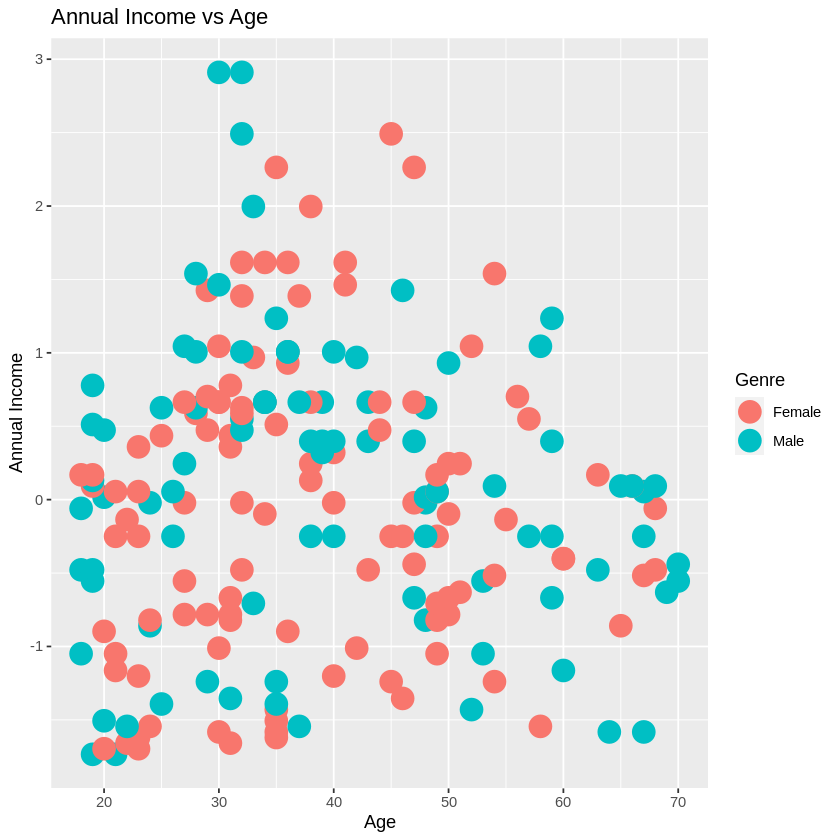

In [91]:
ggplot(ai_age_tb, aes(x=Age, y=Annual.Income.Scaled, color = tb$Genre)) +
     geom_point(size=6)+
      ggtitle("Annual Income vs Age")+
      ylab("Annual Income") +
      xlab("Age")+
      guides(color = guide_legend(title = "Genre"))

Find the optimal number of clusters

In [92]:
set.seed(42)

# Calc. total within-cluster sum of square 
wss <- function(k) {
  kmeans(ai_age_tb, k, nstart = 25 )$tot.withinss
}

In [93]:
# Compute and plot wss for k = 1 to k = 15
ks <- 2:15

# extract wss for 2-15 clusters
wss_values <- map_dbl(ks, wss)

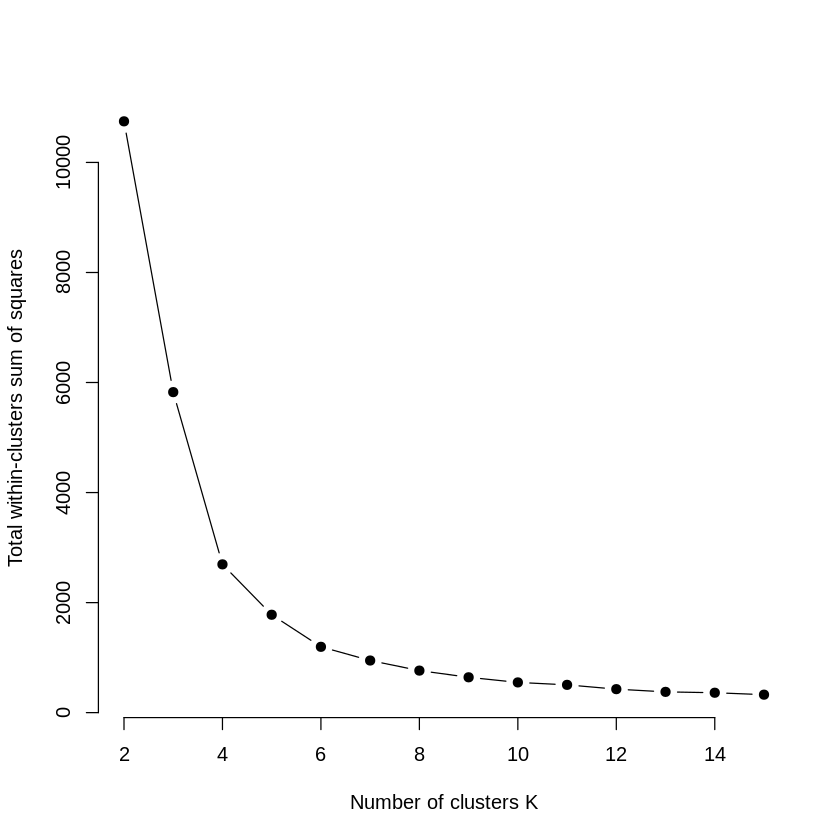

In [94]:
plot(ks, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

In the relation between Age and Annual Income, the optimal number of cluster seems to be 5.

## Spending Score vs Age

In [95]:
ss_age_tb <- tb %>%
         select(Age, Spending.Score.Scaled) %>% as_tibble()
head(ss_age_tb,4)

Age,Spending.Score.Scaled
<int>,<dbl>
19,-0.4337131
21,1.1927111
20,-1.7116178
23,1.0378135


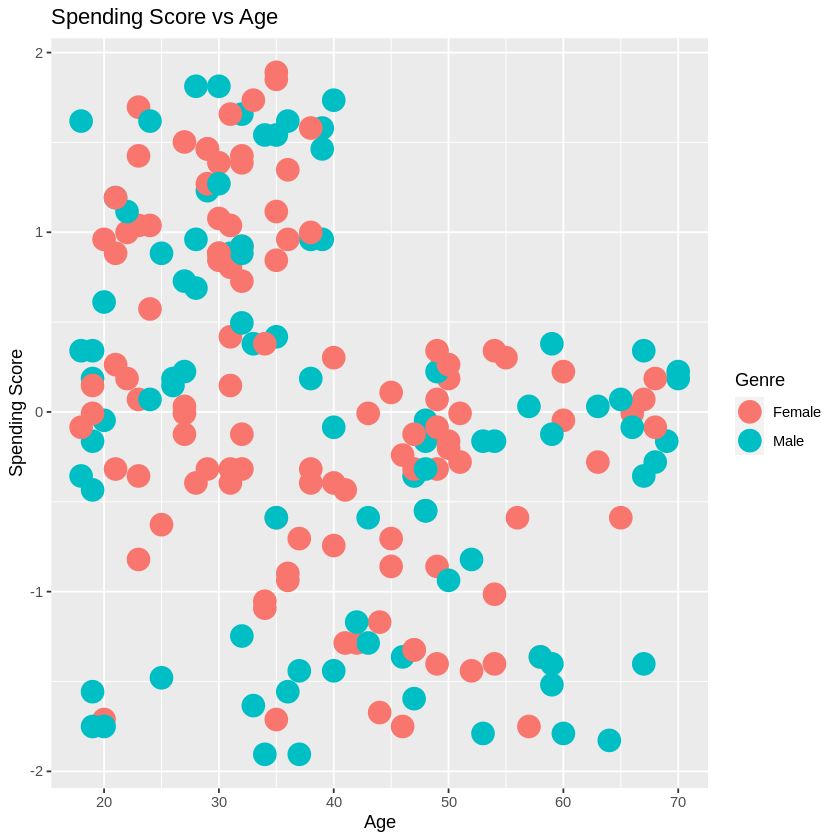

In [96]:
ggplot(ss_age_tb, aes(x=Age, y=Spending.Score.Scaled, color = tb$Genre)) +
     geom_point(size=6)+
      ggtitle("Spending Score vs Age")+
      ylab("Spending Score") +
      xlab("Age")+
      guides(color = guide_legend(title = "Genre"))

Find the optimal number of clusters

In [97]:
set.seed(42)

# Calc. total within-cluster sum of square 
wss <- function(k) {
  kmeans(ss_age_tb, k, nstart = 25 )$tot.withinss
}

In [98]:
# Compute and plot wss for k = 1 to k = 15
ks <- 2:15

# extract wss for 2-15 clusters
wss_values <- map_dbl(ks, wss)

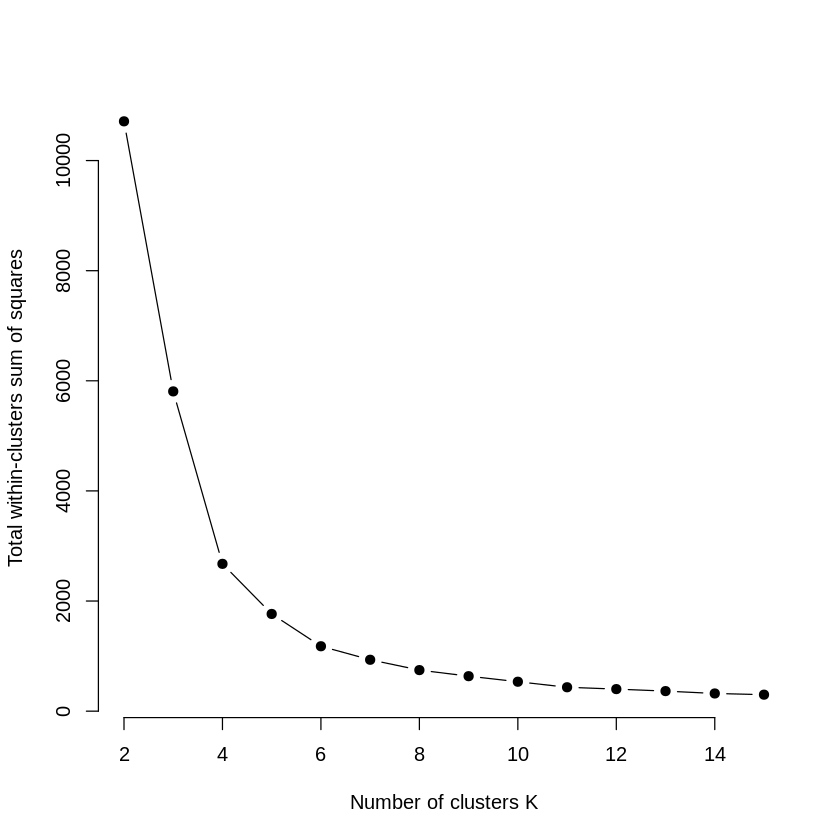

In [99]:
plot(ks, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

In the relation between Age and Spending_Score, the optimal number of cluster seems to be 5.

# 10. K-means Clustering with all 03 features (Spending Score, Annual Score, Age)

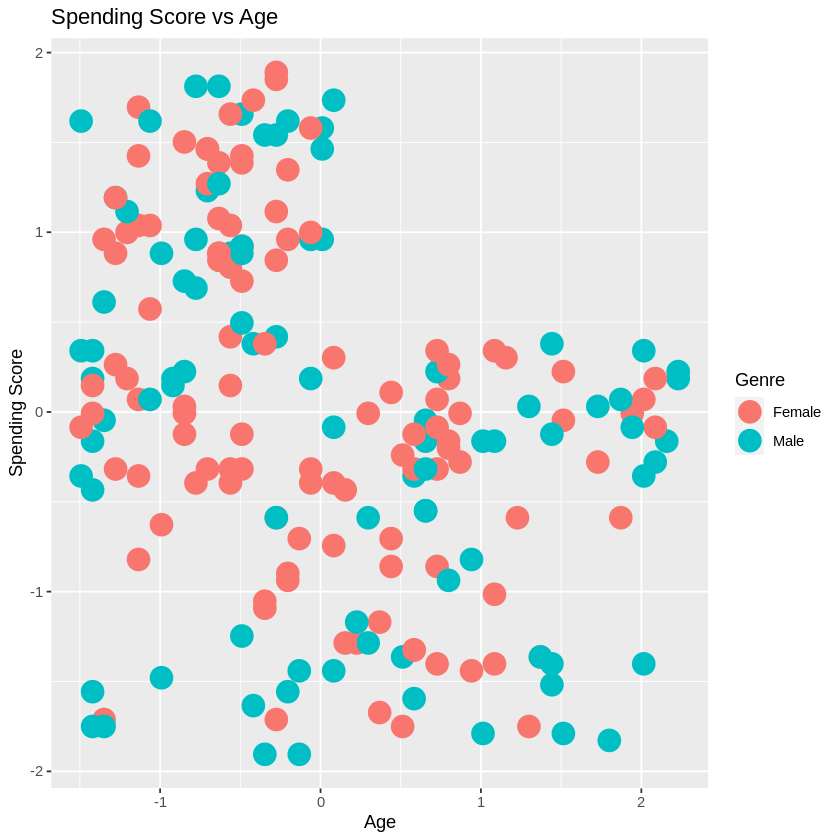

In [101]:
ggplot(tb_scaled, aes(x=Age, y=Spending.Score, color = tb$Genre)) +
     geom_point(size=6)+
      ggtitle("Spending Score vs Age")+
      ylab("Spending Score") +
      xlab("Age")+
      guides(color = guide_legend(title = "Genre"))

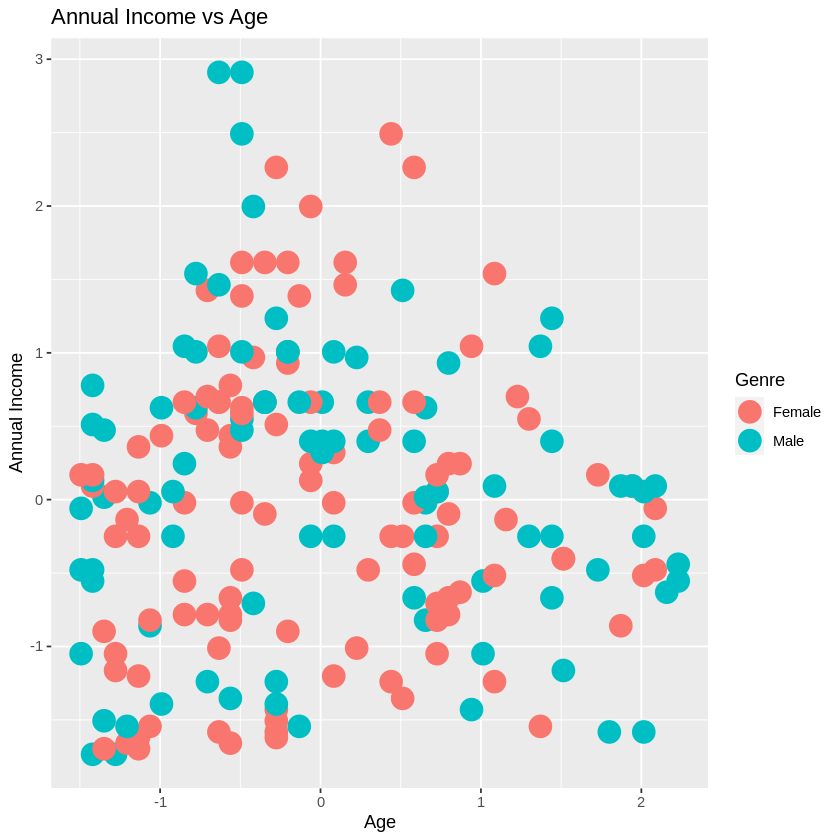

In [102]:
ggplot(tb_scaled, aes(x=Age, y=Annual.Income, color = tb$Genre)) +
     geom_point(size=6)+
      ggtitle("Annual Income vs Age")+
      ylab("Annual Income") +
      xlab("Age")+
      guides(color = guide_legend(title = "Genre"))

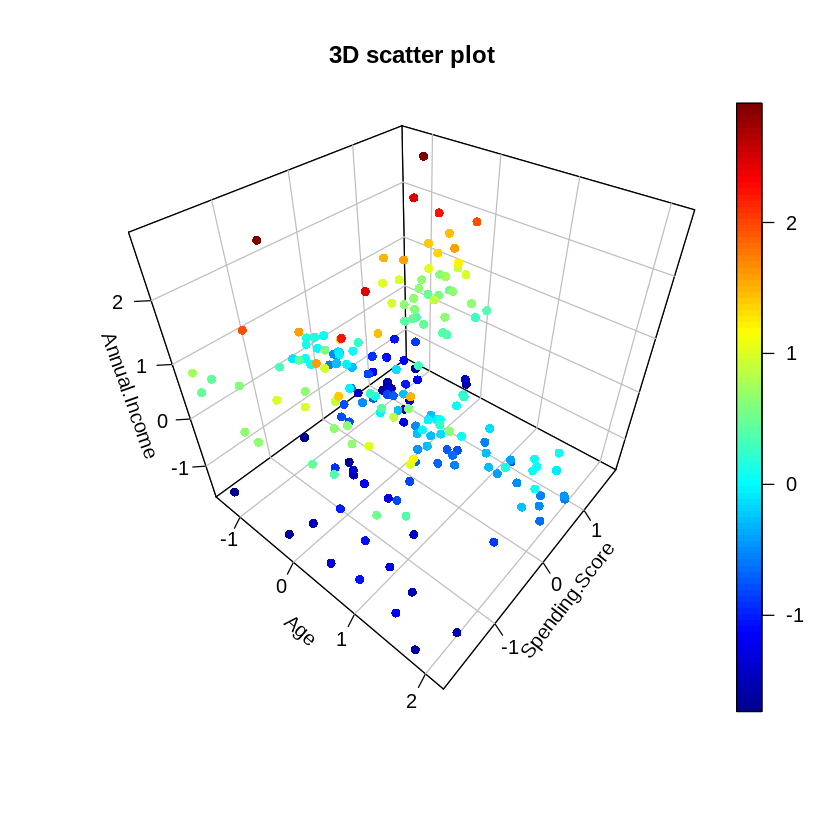

In [103]:
# Call to scatter3D function
scatter3D(tb_scaled$Age, y=tb_scaled$Spending.Score, z=tb_scaled$Annual.Income,
box=TRUE,pch=16,bty="b2",axes=TRUE,
label=TRUE, nticks=5, ticktype="detailed",
theta=40, phi=40,
xlab="Age", ylab="Spending.Score", zlab="Annual.Income",
main="3D scatter plot")

## Find the optimal number of clusters using Elbow Method

In [104]:
glimpse(tb_scaled)

Rows: 200
Columns: 3
$ Age            <dbl> -1.4210029, -1.2778288, -1.3494159, -1.1346547, -0.5619…
$ Annual.Income  <dbl> -1.734646, -1.734646, -1.696572, -1.696572, -1.658498, …
$ Spending.Score <dbl> -0.4337131, 1.1927111, -1.7116178, 1.0378135, -0.394988…


In [105]:
set.seed(42)

# Calc. total within-cluster sum of square 
wss <- function(k) {
  kmeans(tb_scaled, k, nstart = 25 )$tot.withinss
}

In [106]:
# Compute and plot wss for k = 1 to k = 15
ks <- 2:15

# extract wss for 2-15 clusters
wss_values <- map_dbl(ks, wss)

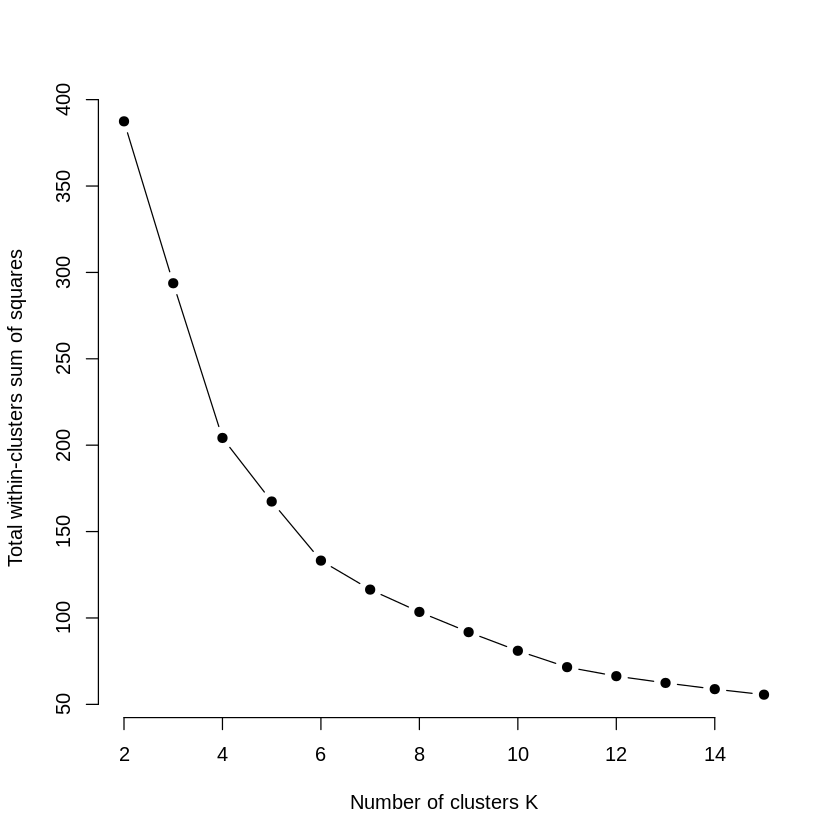

In [107]:
plot(ks, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

The optimal number of cluster should be 6.
<!-- as expected/predicted in Customer_Segmentation_DataAnalysis_R.ipynb. -->

These approaches suggest 6 as the number of optimal clusters, we can perform the final analysis and extract the results using 6 clusters.

In [108]:
kmeans_model <- kmeans(tb_scaled, centers = 6, nstart = 25)

# Show the clusters from the model
print(kmeans_model)

K-means clustering with 6 clusters of sizes 24, 39, 21, 45, 38, 33

Cluster means:
         Age Annual.Income Spending.Score
1 -0.9735839    -1.3221791     1.03458649
2 -0.4408110     0.9891010     1.23640011
3  0.4777583    -1.3049552    -1.19344867
4  1.2515802    -0.2396117    -0.04388764
5 -0.8709130    -0.1135003    -0.09334615
6  0.2211606     1.0805138    -1.28682305

Clustering vector:
  [1] 1 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 [38] 1 3 1 4 1 3 1 3 1 4 5 5 5 4 5 5 4 4 4 4 4 5 4 4 5 4 4 4 5 4 4 5 5 4 4 4 4
 [75] 4 5 4 5 5 4 4 5 4 4 5 4 4 5 5 4 4 5 4 5 5 5 4 5 4 5 5 4 4 5 4 5 4 4 4 4 4
[112] 5 5 5 5 5 4 4 4 4 5 5 5 2 5 2 6 2 6 2 6 2 5 2 6 2 6 2 5 2 6 2 5 2 6 2 6 2
[149] 6 2 6 2 6 2 6 2 6 2 6 2 4 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6
[186] 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2

Within cluster sum of squares by cluster:
[1] 11.71664 22.36267 20.52332 23.87015 20.20990 34.51630
 (between_SS / total_SS =  77.7 %)

Available components:

[1] "cl

In [109]:
str(kmeans_model)

List of 9
 $ cluster     : int [1:200] 1 1 3 1 3 1 3 1 3 1 ...
 $ centers     : num [1:6, 1:3] -0.974 -0.441 0.478 1.252 -0.871 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:6] "1" "2" "3" "4" ...
  .. ..$ : chr [1:3] "Age" "Annual.Income" "Spending.Score"
 $ totss       : num 597
 $ withinss    : num [1:6] 11.7 22.4 20.5 23.9 20.2 ...
 $ tot.withinss: num 133
 $ betweenss   : num 464
 $ size        : int [1:6] 24 39 21 45 38 33
 $ iter        : int 3
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


Visualize the results using fviz_cluster:

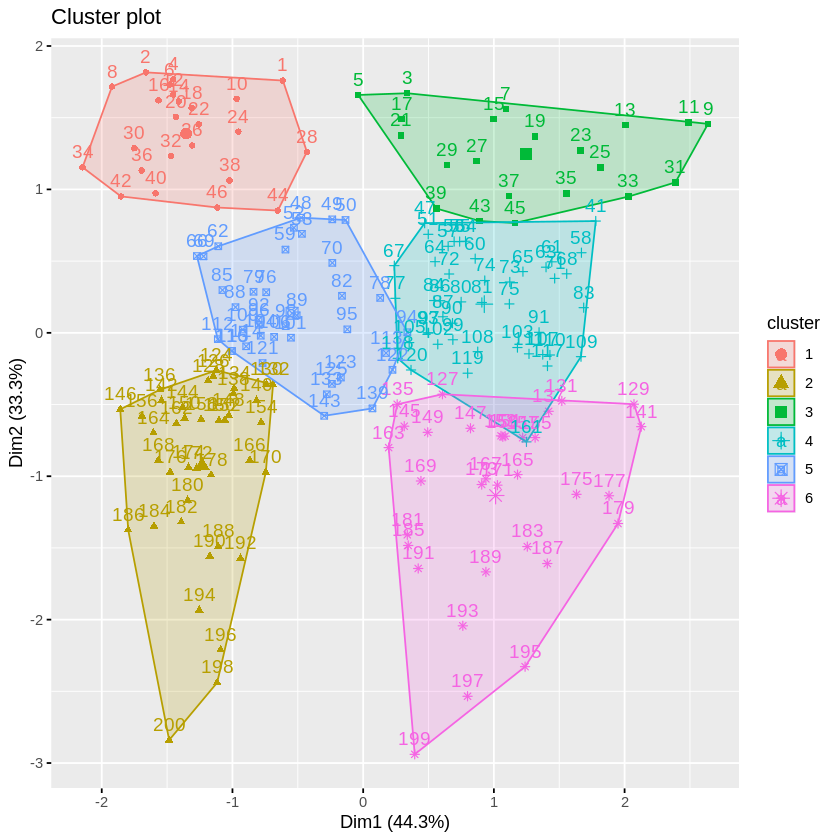

In [110]:
fviz_cluster(kmeans_model, data = tb_scaled)

In [111]:
tb_new <- tb %>% mutate(Cluster = kmeans_model$cluster)
glimpse(tb_new)

Rows: 200
Columns: 9
$ CustomerID            <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…
$ Genre                 <fct> Male, Male, Female, Female, Female, Female, Fema…
$ Age                   <int> 19, 21, 20, 23, 31, 22, 35, 23, 64, 30, 67, 35, …
$ Annual.Income         <int> 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 19, …
$ Spending.Score        <int> 39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 14, 99, 15,…
$ Annual.Income.Scaled  <dbl> -1.734646, -1.734646, -1.696572, -1.696572, -1.6…
$ Spending.Score.Scaled <dbl> -0.4337131, 1.1927111, -1.7116178, 1.0378135, -0…
$ Age.Scaled            <dbl> -1.4210029, -1.2778288, -1.3494159, -1.1346547, …
$ Cluster               <int> 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, …


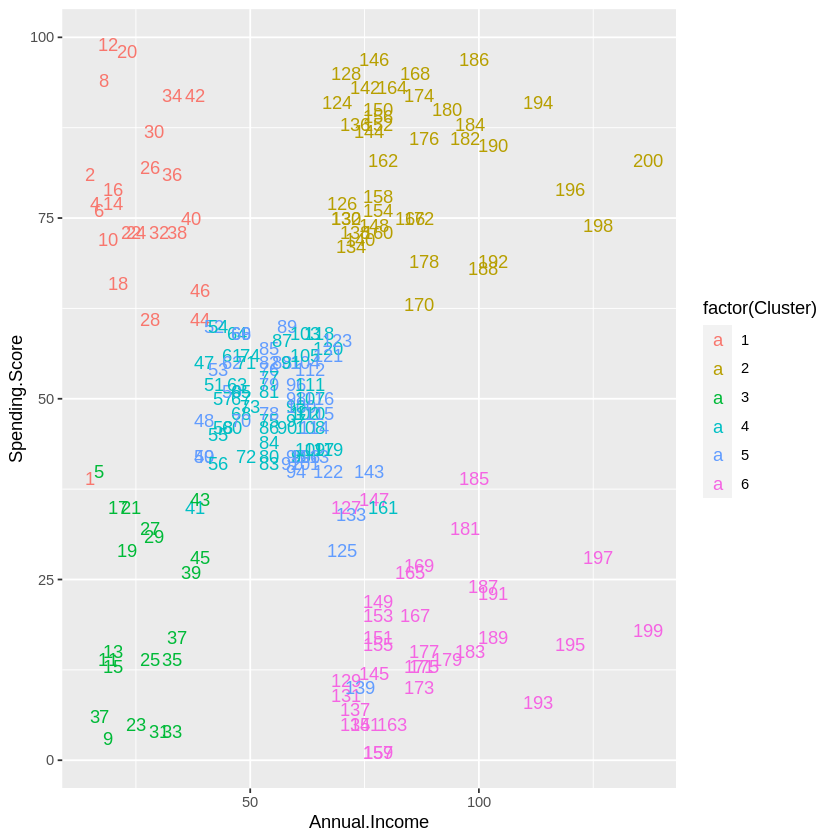

In [112]:
tb_new %>%
  # mutate(cluster = k2_model$cluster) %>%
  ggplot(aes(Annual.Income, Spending.Score, color = factor(Cluster), label = CustomerID)) +
  guides(fill = guide_legend(title = "Cluster")) +
  geom_text()

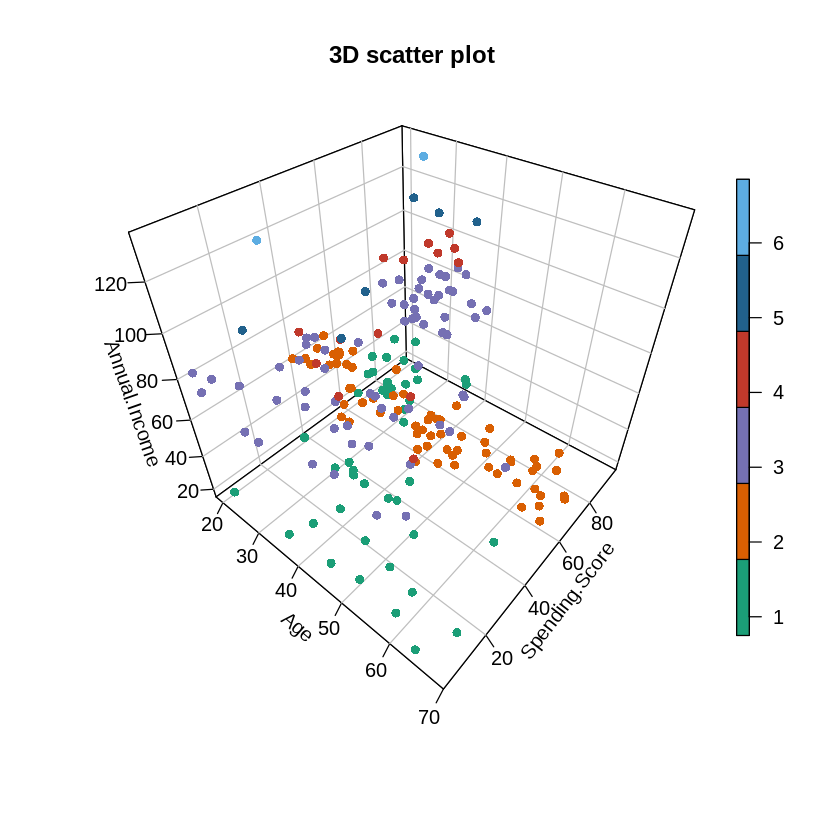

In [113]:
# Call to scatter3D function
scatter3D(tb_new$Age, y=tb_new$Spending.Score, z=tb_new$Annual.Income,
col.var = as.integer(tb_new$Cluster), 
col = c("#1B9E77", "#D95F02", "#7570B3", "#C0392B", "#21618C", "#5DADE2"),
colkey = list(at = c(20, 40, 60, 80, 100, 120), side = 4, addlines = TRUE, length = 0.75, width = 0.5, labels = c("1", "2", "3", "4", "5", "6")),
box=TRUE,pch=16,bty="b2",axes=TRUE,
label=TRUE, nticks=5, ticktype="detailed",
theta=40, phi=40,
xlab="Age", ylab="Spending.Score", zlab="Annual.Income",
main="3D scatter plot")

Compute PCA and extract individual coordinates

In [115]:
# Dimension reduction using PCA
res.pca <- prcomp(tb_scaled,  scale = FALSE)

# Coordinates of individuals
ind.coord <- as.data.frame(get_pca_ind(res.pca)$coord)

# Add clusters obtained using the K-means algorithm
ind.coord$cluster <- factor(kmeans_model$cluster)

# Add Species groups from the original data sett
ind.coord$Genre <- tb$Genre

# Data inspection
head(ind.coord)

,Dim.1,Dim.2,Dim.3,cluster,Genre
,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,-0.61417879,1.759067,-1.32091743,1,Male
2,-1.66162301,1.816189,-0.06977714,1,Male
3,0.33701620,1.670607,-2.17357077,3,Female
4,-1.45292726,1.767993,-0.07783381,1,Female
5,-0.03836892,1.658578,-0.68562168,3,Female
6,-1.47797641,1.730659,-0.15563214,1,Female


Visualize k-means clusters

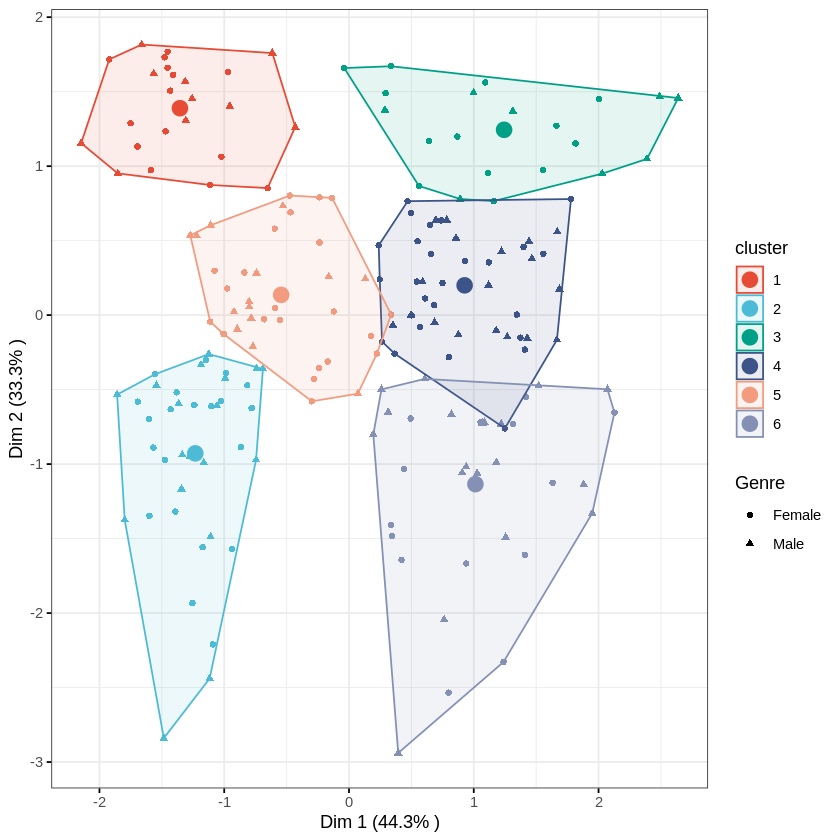

In [119]:
ggscatter(
  ind.coord, x = "Dim.1", y = "Dim.2", 
  color = "cluster", palette = "npg", ellipse = TRUE, ellipse.type = "convex",
  shape = "Genre", size = 1.5,  legend = "right", ggtheme = theme_bw(),
  xlab = paste0("Dim 1 (", variance.percent[1], "% )" ),
  ylab = paste0("Dim 2 (", variance.percent[2], "% )" )
) +
  stat_mean(aes(color = cluster), size = 4)

# 11. Add customers' clusters to data

Add clusters to our initial data to do some descriptive statistics.

In [121]:
glimpse(tb_scaled)

Rows: 200
Columns: 3
$ Age            <dbl> -1.4210029, -1.2778288, -1.3494159, -1.1346547, -0.5619…
$ Annual.Income  <dbl> -1.734646, -1.734646, -1.696572, -1.696572, -1.658498, …
$ Spending.Score <dbl> -0.4337131, 1.1927111, -1.7116178, 1.0378135, -0.394988…


In [122]:
glimpse(tb)

Rows: 200
Columns: 8
$ CustomerID            <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…
$ Genre                 <fct> Male, Male, Female, Female, Female, Female, Fema…
$ Age                   <int> 19, 21, 20, 23, 31, 22, 35, 23, 64, 30, 67, 35, …
$ Annual.Income         <int> 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 19, …
$ Spending.Score        <int> 39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 14, 99, 15,…
$ Annual.Income.Scaled  <dbl> -1.734646, -1.734646, -1.696572, -1.696572, -1.6…
$ Spending.Score.Scaled <dbl> -0.4337131, 1.1927111, -1.7116178, 1.0378135, -0…
$ Age.Scaled            <dbl> -1.4210029, -1.2778288, -1.3494159, -1.1346547, …


In [123]:
glimpse(tb_new)

Rows: 200
Columns: 9
$ CustomerID            <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…
$ Genre                 <fct> Male, Male, Female, Female, Female, Female, Fema…
$ Age                   <int> 19, 21, 20, 23, 31, 22, 35, 23, 64, 30, 67, 35, …
$ Annual.Income         <int> 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 19, …
$ Spending.Score        <int> 39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 14, 99, 15,…
$ Annual.Income.Scaled  <dbl> -1.734646, -1.734646, -1.696572, -1.696572, -1.6…
$ Spending.Score.Scaled <dbl> -0.4337131, 1.1927111, -1.7116178, 1.0378135, -0…
$ Age.Scaled            <dbl> -1.4210029, -1.2778288, -1.3494159, -1.1346547, …
$ Cluster               <int> 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, …


# 12. Hierarchical clustering

A tree-based representation of the objects, which is also known as dendrogram.

In [131]:
# Compute hierarchical clustering
hc <- tb_scaled %>%
  # scale() %>%                    # Scale the data
  dist(method = "euclidean") %>% # Compute dissimilarity matrix
  hclust(method = "ward.D")     # Compute hierachical clustering, "ward.D", "ward.D2", "single", "complete", "average" (= UPGMA), "mcquitty" (= WPGMA), "median" (= WPGMC) or "centroid" (= UPGMC).

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


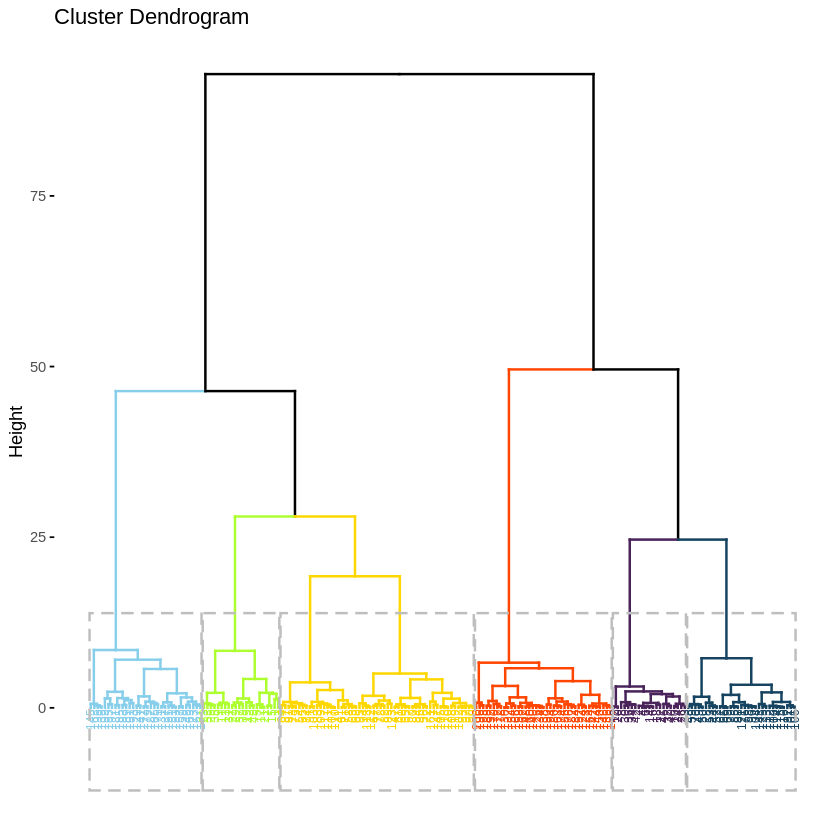

In [132]:
# Visualize using factoextra
# Cut in 4 groups and color by groups
fviz_dend(hc, k = 6, # Cut in four groups
          cex = 0.5, # label size
          k_colors = c("#87CEEB", "#ADFF2F", "#FFD700", "#FF4500", "#4A235A", "#154360"),
          color_labels_by_k = TRUE, # color labels by groups
          rect = TRUE # Add rectangle around groups
          )

# 13. Save cleaned data to CSV

In [124]:
csv_file <- paste0(DATA_PATH, 'Customers_with_Clusters.csv')
write_csv(tb_new, csv_file)

# 14. Some Comments

Clustering is a popular technique for segmenting data. The primary options for clustering in R are : kmeans for K-means, and hclust for hierarchical clustering.

K-means clustering is a very simple and fast algorithm. Furthermore, it can efficiently deal with very large data sets. However, there are some weaknesses of the k-means approach.

One potential disadvantage of K-means clustering is that it requires us to pre-specify the number of clusters. Hierarchical clustering is an alternative approach which does not require that we commit to a particular choice of clusters. Hierarchical clustering has an added advantage over K-means clustering in that it results in an attractive tree-based representation of the observations, called a dendrogram. A future tutorial will illustrate the hierarchical clustering approach.

An additional disadvantage of K-means is that it’s sensitive to outliers and different results can occur if you change the ordering of your data. The Partitioning Around Medoids (PAM) clustering approach is less sensititive to outliers and provides a robust alternative to k-means to deal with these situations. A future tutorial will illustrate the PAM clustering approach.